In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import plotly.express as px
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
from boruta import BorutaPy
import lightgbm as lgb
from catboost import CatBoostRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import shap
import joblib


In [2]:
folder = glob.glob("C:/Users/Michelle.Gitau/Desktop/PROJECT/Bonds/*")

dataset = []

for file in folder:
    df = pd.read_excel(file)
    dataset.append(df)
    
dt = pd.DataFrame(pd.concat(dataset))
dt.head()



,Bond,Date,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28


In [3]:
dt.shape

(17569, 7)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17569 entries, 0 to 33
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bond           17569 non-null  object        
 1   Date           17560 non-null  datetime64[ns]
 2   PX_LAST        17569 non-null  float64       
 3   YLD_CNV_LAST   17569 non-null  float64       
 4   Coupon         17569 non-null  float64       
 5   Issue_date     17569 non-null  datetime64[ns]
 6   Maturity_date  17569 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(3), object(1)
memory usage: 1.1+ MB


In [5]:
dt.dropna(axis=0, inplace=True)

In [6]:
dt.shape

(17560, 7)

In [7]:
dt['Month'] = (dt.Date).dt.month
dt['Year'] = (dt.Date).dt.year


In [8]:
inflation = pd.read_csv('Inflation_Rates.csv')


In [9]:
result = pd.merge(dt, inflation, on=['Month', 'Year'], how='inner')


In [10]:
result.shape

(17722, 13)

In [11]:
result['dup'] = result.duplicated(subset=None, keep='first')

In [12]:
result.dup.value_counts()

False    17540
True       182
Name: dup, dtype: int64

In [13]:
result = result[result.dup == False]


In [14]:
result = result.drop(['dup'], axis=1)
result.shape

(17540, 13)

In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 17721
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Bond                      17540 non-null  object        
 1   Date_x                    17540 non-null  datetime64[ns]
 2   PX_LAST                   17540 non-null  float64       
 3   YLD_CNV_LAST              17540 non-null  float64       
 4   Coupon                    17540 non-null  float64       
 5   Issue_date                17540 non-null  datetime64[ns]
 6   Maturity_date             17540 non-null  datetime64[ns]
 7   Month                     17540 non-null  int64         
 8   Year                      17540 non-null  int64         
 9   Day                       17540 non-null  int64         
 10  Annual Average Inflation  17540 non-null  float64       
 11  12-Month Inflation        17540 non-null  float64       
 12  Date_y            

In [16]:
result = result.drop(['Day', 'Date_y'], axis=1)

In [17]:
result.shape

(17540, 11)

In [18]:
cpi = pd.read_excel('Historical_CPI.xlsx')
cpi.head()

,Year,Month,Day,Date,Index
0,1962,3,1,1962-03-01,0.475034
1,1962,6,1,1962-06-01,0.480142
2,1962,9,1,1962-09-01,0.485250
3,1962,12,1,1962-12-01,0.490358
4,1963,3,1,1963-03-01,0.485250


In [19]:
cpi.shape

(556, 5)

In [20]:
res_cpi = pd.merge(result, cpi, on=['Month', 'Year'], how='left')
res_cpi.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Day,Date,Index
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,1.0,2023-02-01,130.13
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,1.0,2023-02-01,130.13
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,1.0,2023-02-01,130.13
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,1.0,2023-02-01,130.13
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,1.0,2023-02-01,130.13


In [21]:
res_cpi.shape

(18363, 14)

In [22]:
res_cpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18363 entries, 0 to 18362
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Bond                      18363 non-null  object        
 1   Date_x                    18363 non-null  datetime64[ns]
 2   PX_LAST                   18363 non-null  float64       
 3   YLD_CNV_LAST              18363 non-null  float64       
 4   Coupon                    18363 non-null  float64       
 5   Issue_date                18363 non-null  datetime64[ns]
 6   Maturity_date             18363 non-null  datetime64[ns]
 7   Month                     18363 non-null  int64         
 8   Year                      18363 non-null  int64         
 9   Annual Average Inflation  18363 non-null  float64       
 10  12-Month Inflation        18363 non-null  float64       
 11  Day                       16677 non-null  float64       
 12  Date              

In [23]:
res_cpi['dup'] = res_cpi.duplicated(subset=['Bond','Date_x','PX_LAST','YLD_CNV_LAST'], keep='first')
res_cpi

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Day,Date,Index,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,1.0,2023-02-01,130.13,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,1.0,2023-02-01,130.13,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,1.0,2023-02-01,130.13,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,1.0,2023-02-01,130.13,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,1.0,2023-02-01,130.13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,IFB1/2023/17,2023-03-07,17.717,81.48,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,1.0,2023-03-01,131.18,False
18359,IFB1/2023/17,2023-03-06,19.485,74.18,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,1.0,2023-03-01,131.18,False
18360,IFB1/2023/17,2023-03-03,19.487,74.17,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,1.0,2023-03-01,131.18,False
18361,IFB1/2023/17,2023-03-02,19.498,74.13,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,1.0,2023-03-01,131.18,False


In [24]:
res_cpi.dup.nunique()

2

In [25]:
res_cpi.dup.value_counts()

False    17540
True       823
Name: dup, dtype: int64

In [26]:
res_cpi = res_cpi[res_cpi.dup == False]
res_cpi.shape

(17540, 15)

In [27]:
res_cpi = res_cpi.drop(['Day', 'Date','dup'], axis=1)
res_cpi.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13


In [28]:
res_cpi.shape

(17540, 12)

In [29]:
fx = pd.read_excel('FX_DATA.xlsx')
fx.head()

,Date,Currency,Mean_UD,Buy_UD,Sell_UD,Month,Year
0,2016-10-11 00:00:00,US DOLLAR,101.2847,101.1889,101.3806,10,2016
1,2016-10-13 00:00:00,US DOLLAR,101.2953,101.1994,101.3911,10,2016
2,2016-10-13 00:00:00,US DOLLAR,101.2953,101.1994,101.3911,10,2016
3,2016-10-13 00:00:00,US DOLLAR,101.2953,101.1994,101.3911,10,2016
4,2016-10-13 00:00:00,US DOLLAR,101.2953,101.1994,101.3911,10,2016


In [30]:
fx_data = pd.merge(res_cpi, fx, on=['Month', 'Year'], how='left')
fx_data.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Date,Currency,Mean_UD,Buy_UD,Sell_UD
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471


In [31]:
fx_data.shape

(359714, 17)

In [32]:
fx_data['dup'] = fx_data.duplicated(subset=['Bond','Date_x','PX_LAST','YLD_CNV_LAST','Index'], keep='first')
fx_data

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Date,Currency,Mean_UD,Buy_UD,Sell_UD,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359709,IFB1/2023/17,2023-03-07,17.717,81.48,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,131.18,NaN,NaN,NaN,NaN,NaN,False
359710,IFB1/2023/17,2023-03-06,19.485,74.18,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,131.18,NaN,NaN,NaN,NaN,NaN,False
359711,IFB1/2023/17,2023-03-03,19.487,74.17,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,131.18,NaN,NaN,NaN,NaN,NaN,False
359712,IFB1/2023/17,2023-03-02,19.498,74.13,0.14399,2023-03-13,2040-02-20,3,2023,8.59,9.19,131.18,NaN,NaN,NaN,NaN,NaN,False


In [33]:
fx_data.dup.value_counts()

True     342174
False     17540
Name: dup, dtype: int64

In [34]:
fx_data = fx_data[fx_data.dup == False]
fx_data.shape

(17540, 18)

In [35]:
fx_data.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Date,Currency,Mean_UD,Buy_UD,Sell_UD,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,2023-02-01 00:00:00,US DOLLAR,124.4765,124.376471,124.576471,False


In [36]:
fx_data = fx_data.drop(['Date','dup'], axis=1)
fx_data.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency,Mean_UD,Buy_UD,Sell_UD
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471


In [37]:
fx_data.shape

(17540, 16)

In [38]:
fx_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 359713
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Bond                      17540 non-null  object        
 1   Date_x                    17540 non-null  datetime64[ns]
 2   PX_LAST                   17540 non-null  float64       
 3   YLD_CNV_LAST              17540 non-null  float64       
 4   Coupon                    17540 non-null  float64       
 5   Issue_date                17540 non-null  datetime64[ns]
 6   Maturity_date             17540 non-null  datetime64[ns]
 7   Month                     17540 non-null  int64         
 8   Year                      17540 non-null  int64         
 9   Annual Average Inflation  17540 non-null  float64       
 10  12-Month Inflation        17540 non-null  float64       
 11  Index                     15854 non-null  float64       
 12  Currency         

In [39]:
euro = pd.read_excel('Euro.xlsx')
euro.head()

,Date,Currency,Mean_euro,Buy_euro,Sell_euro,Month,Year
0,2016-10-11,EURO,112.9458,112.8267,113.0650,10,2016
1,2016-10-13,EURO,112.2600,112.1428,112.3772,10,2016
2,2016-10-13,EURO,112.2600,112.1428,112.3772,10,2016
3,2016-10-13,EURO,112.2600,112.1428,112.3772,10,2016
4,2016-10-13,EURO,112.2600,112.1428,112.3772,10,2016


In [40]:
euro_data = pd.merge(fx_data, euro, on=['Month', 'Year'], how='left')
euro_data.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Index,Currency_x,Mean_UD,Buy_UD,Sell_UD,Date,Currency_y,Mean_euro,Buy_euro,Sell_euro
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118


In [41]:
euro_data['dup'] = euro_data.duplicated(subset=['Bond','Date_x','PX_LAST','YLD_CNV_LAST','Index'], keep='first')
euro_data

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_x,Mean_UD,Buy_UD,Sell_UD,Date,Currency_y,Mean_euro,Buy_euro,Sell_euro,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.11250,2010-06-28,2035-05-28,2,2023,8.30,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.11250,2010-06-28,2035-05-28,2,2023,8.30,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359709,IFB1/2023/17,2023-03-07,17.717,81.48,0.14399,2023-03-13,2040-02-20,3,2023,8.59,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,False
359710,IFB1/2023/17,2023-03-06,19.485,74.18,0.14399,2023-03-13,2040-02-20,3,2023,8.59,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,False
359711,IFB1/2023/17,2023-03-03,19.487,74.17,0.14399,2023-03-13,2040-02-20,3,2023,8.59,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,False
359712,IFB1/2023/17,2023-03-02,19.498,74.13,0.14399,2023-03-13,2040-02-20,3,2023,8.59,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,False


In [42]:
euro_data.dup.value_counts()

True     342174
False     17540
Name: dup, dtype: int64

In [43]:
euro_data = euro_data[euro_data.dup == False]
euro_data.shape

(17540, 22)

In [44]:
euro_data.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_x,Mean_UD,Buy_UD,Sell_UD,Date,Currency_y,Mean_euro,Buy_euro,Sell_euro,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,2023-02-01,EURO,134.9229,134.791765,135.054118,False


In [45]:
euro_data = euro_data.drop(['Date','dup'], axis=1)
euro_data.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency_x,Mean_UD,Buy_UD,Sell_UD,Currency_y,Mean_euro,Buy_euro,Sell_euro
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118


In [46]:
cbr = pd.read_csv('Central_Bank_Rate.csv')
cbr.head()

,Date,Rate
0,29/03/2023,9.50
1,30/01/2023,8.75
2,23/11/2022,8.75
3,29/09/2022,8.25
4,27/07/2022,7.50


In [47]:
cbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    103 non-null    object 
 1   Rate    103 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [48]:
cbr.Date = pd.to_datetime(cbr.Date)
cbr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    103 non-null    datetime64[ns]
 1   Rate    103 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [49]:
cbr['Month'] = cbr.Date.dt.month
cbr['Year'] = cbr.Date.dt.year

In [50]:
cbr.head()

,Date,Rate,Month,Year
0,2023-03-29,9.50,3,2023
1,2023-01-30,8.75,1,2023
2,2022-11-23,8.75,11,2022
3,2022-09-29,8.25,9,2022
4,2022-07-27,7.50,7,2022


In [51]:
dataset = pd.merge(euro_data, cbr, on=['Month', 'Year'], how='left')
dataset.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_x,Mean_UD,Buy_UD,Sell_UD,Currency_y,Mean_euro,Buy_euro,Sell_euro,Date,Rate
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN


In [52]:
dataset.shape

(18050, 22)

In [53]:
dataset['dup'] = dataset.duplicated(subset=['Bond','Date_x','PX_LAST','YLD_CNV_LAST','Index','Mean_UD'], keep='first')
dataset.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Mean_UD,Buy_UD,Sell_UD,Currency_y,Mean_euro,Buy_euro,Sell_euro,Date,Rate,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaT,NaN,False


In [54]:
dataset.dup.value_counts()

False    17540
True       510
Name: dup, dtype: int64

In [55]:
dataset = dataset[dataset.dup == False]
dataset.shape

(17540, 23)

In [56]:
dataset = dataset.drop(['Date','dup'], axis=1)
dataset.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Index,Currency_x,Mean_UD,Buy_UD,Sell_UD,Currency_y,Mean_euro,Buy_euro,Sell_euro,Rate
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 18049
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Bond                      17540 non-null  object        
 1   Date_x                    17540 non-null  datetime64[ns]
 2   PX_LAST                   17540 non-null  float64       
 3   YLD_CNV_LAST              17540 non-null  float64       
 4   Coupon                    17540 non-null  float64       
 5   Issue_date                17540 non-null  datetime64[ns]
 6   Maturity_date             17540 non-null  datetime64[ns]
 7   Month                     17540 non-null  int64         
 8   Year                      17540 non-null  int64         
 9   Annual Average Inflation  17540 non-null  float64       
 10  12-Month Inflation        17540 non-null  float64       
 11  Index                     15854 non-null  float64       
 12  Currency_x        

In [58]:
dataset.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Index,Currency_x,Mean_UD,Buy_UD,Sell_UD,Currency_y,Mean_euro,Buy_euro,Sell_euro,Rate
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,124.376471,124.576471,EURO,134.9229,134.791765,135.054118,NaN


In [59]:
dataset = dataset.drop(['Buy_UD', 'Sell_UD', 'Buy_euro', 'Sell_euro'], axis=1)
dataset.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency_x,Mean_UD,Currency_y,Mean_euro,Rate
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 18049
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Bond                      17540 non-null  object        
 1   Date_x                    17540 non-null  datetime64[ns]
 2   PX_LAST                   17540 non-null  float64       
 3   YLD_CNV_LAST              17540 non-null  float64       
 4   Coupon                    17540 non-null  float64       
 5   Issue_date                17540 non-null  datetime64[ns]
 6   Maturity_date             17540 non-null  datetime64[ns]
 7   Month                     17540 non-null  int64         
 8   Year                      17540 non-null  int64         
 9   Annual Average Inflation  17540 non-null  float64       
 10  12-Month Inflation        17540 non-null  float64       
 11  Index                     15854 non-null  float64       
 12  Currency_x        

In [61]:
dataset['Tenor'] = dataset.Maturity_date - dataset.Date_x
dataset.head()

,Bond,Date_x,PX_LAST,YLD_CNV_LAST,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency_x,Mean_UD,Currency_y,Mean_euro,Rate,Tenor
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4484 days
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4485 days
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4486 days
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4487 days


In [62]:
dataset.shape

(17540, 18)

In [63]:
dataset.rename(columns = {'Date_x':'Date', 'PX_LAST':'Priceper100','YLD_CNV_LAST':'YTM', 'Currency_x':'Currency_usd', 'Currency_y':'Currency_euro'}, inplace = True)
dataset.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4484 days
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4485 days
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4486 days
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4487 days


In [64]:
gold = pd.read_excel('GOLD PRICES.xlsx')
gold.head()

,Date,Gold_Price
0,2023-05-23,1975.23
1,2023-05-22,1971.86
2,2023-05-19,1977.81
3,2023-05-18,1957.55
4,2023-05-17,1981.84


In [65]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1660 non-null   datetime64[ns]
 1   Gold_Price  1660 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.1 KB


In [66]:
gold.Date = pd.to_datetime(gold.Date)
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1660 non-null   datetime64[ns]
 1   Gold_Price  1660 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.1 KB


In [67]:
gold['Month'] = gold.Date.dt.month
gold['Year'] = gold.Date.dt.year
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1660 non-null   datetime64[ns]
 1   Gold_Price  1660 non-null   float64       
 2   Month       1660 non-null   int64         
 3   Year        1660 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 52.0 KB


In [68]:
gold_data = pd.merge(dataset, gold, on=['Month', 'Year'], how='left')
gold_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Date_y,Gold_Price
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-28,1826.92
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-27,1817.14
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-24,1811.04
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-23,1822.28
4,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-22,1825.39


In [69]:
gold_data.shape

(380846, 20)

In [70]:
gold_data['dup'] = gold_data.duplicated(subset=['Bond','Date_x','Priceper100','YTM','Index','Mean_UD'], keep='first')
gold_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Index,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Date_y,Gold_Price,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-28,1826.92,False
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-27,1817.14,True
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-24,1811.04,True
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-23,1822.28,True
4,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,2023-02-22,1825.39,True


In [71]:
gold_data.dup.value_counts()

True     363306
False     17540
Name: dup, dtype: int64

In [72]:
gold_data = gold_data[gold_data.dup == False]
gold_data.shape

(17540, 21)

In [73]:
gold_data = gold_data.drop(['Date_y','dup'], axis=1)
gold_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,12-Month Inflation,Index,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92
20,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4484 days,1826.92
40,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4485 days,1826.92
60,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4486 days,1826.92
80,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,9.23,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4487 days,1826.92


In [74]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 380823
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     15854 non-null  float64        
 12  Cur

In [75]:
oil = pd.read_excel('OIL PRICES.xlsx')
oil.head()

,Date,Oil Price,Oil_Volumes
0,2023-05-23,72.91,317586.0
1,2023-05-22,71.99,18679.0
2,2023-05-19,71.55,69949.0
3,2023-05-18,71.86,80864.0
4,2023-05-17,72.83,273708.0


In [76]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1611 non-null   datetime64[ns]
 1   Oil Price    1611 non-null   float64       
 2   Oil_Volumes  1609 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.9 KB


In [77]:
oil['Month'] = gold.Date.dt.month
oil['Year'] = gold.Date.dt.year
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1611 non-null   datetime64[ns]
 1   Oil Price    1611 non-null   float64       
 2   Oil_Volumes  1609 non-null   float64       
 3   Month        1611 non-null   int64         
 4   Year         1611 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 63.1 KB


In [78]:
oil_data = pd.merge(gold_data, oil, on=['Month', 'Year'], how='left')
oil_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Date,Oil Price,Oil_Volumes
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-03-01,77.69,342121.0
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-28,77.05,300093.0
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-27,75.68,266091.0
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-24,76.32,329254.0
4,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-23,75.39,333838.0


In [79]:
oil_data['dup'] = oil_data.duplicated(subset=['Bond','Date_x','Priceper100','YTM','Index','Mean_UD','Gold_Price'], keep='first')
oil_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Date,Oil Price,Oil_Volumes,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-03-01,77.69,342121.0,False
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-28,77.05,300093.0,True
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-27,75.68,266091.0,True
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-24,76.32,329254.0,True
4,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,2023-02-23,75.39,333838.0,True


In [80]:
oil_data.dup.value_counts()

True     361012
False     17540
Name: dup, dtype: int64

In [81]:
oil_data = oil_data[oil_data.dup == False]
oil_data.shape

(17540, 23)

In [82]:
oil_data = oil_data.drop(['Date','dup'], axis=1)
oil_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Index,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0
20,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4484 days,1826.92,77.69,342121.0
40,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4485 days,1826.92,77.69,342121.0
60,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4486 days,1826.92,77.69,342121.0
80,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,130.13,US DOLLAR,124.4765,EURO,134.9229,NaN,4487 days,1826.92,77.69,342121.0


In [83]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 378529
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     15854 non-null  float64        
 12  Cur

In [84]:
tbills = pd.read_excel('TBILLS.xlsx')
tbills.head()

,Date,1year_tbill_rate
0,2023-05-23,11.39
1,2023-05-22,11.39
2,2023-05-19,11.39
3,2023-05-18,11.39
4,2023-05-17,11.27


In [85]:
tbills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1635 non-null   datetime64[ns]
 1   1year_tbill_rate  1635 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.7 KB


In [86]:
tbills['Month'] = gold.Date.dt.month
tbills['Year'] = gold.Date.dt.year
tbills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1635 non-null   datetime64[ns]
 1   1year_tbill_rate  1635 non-null   float64       
 2   Month             1635 non-null   int64         
 3   Year              1635 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 51.2 KB


In [87]:
tbill_data = pd.merge(oil_data, tbills, on=['Month', 'Year'], how='left')
tbill_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,Date,1year_tbill_rate
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-28,10.676
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-27,10.676
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-24,10.676
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-23,10.676
4,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-22,10.638


In [88]:
tbill_data['dup'] = tbill_data.duplicated(subset=['Bond','Date_x','Priceper100','YTM','Index','Mean_UD','Gold_Price','Oil Price','Oil_Volumes'], keep='first')
tbill_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,Date,1year_tbill_rate,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-28,10.676,False
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-27,10.676,True
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-24,10.676,True
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-23,10.676,True
4,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,2023-02-22,10.638,True


In [89]:
tbill_data.dup.value_counts()

True     362298
False     17540
Name: dup, dtype: int64

In [90]:
tbill_data = tbill_data[tbill_data.dup == False]
tbill_data.shape

(17540, 24)

In [91]:
tbill_data = tbill_data.drop(['Date','dup'], axis=1)
tbill_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_usd,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676
20,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676
40,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4485 days,1826.92,77.69,342121.0,10.676
60,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4486 days,1826.92,77.69,342121.0,10.676
80,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,US DOLLAR,124.4765,EURO,134.9229,NaN,4487 days,1826.92,77.69,342121.0,10.676


In [92]:
tbill_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 379815
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     15854 non-null  float64        
 12  Cur

In [93]:
m3 = pd.read_excel('M3 SUPPLY.xlsx')
m3.head()

,Date,M3_Supply
0,2023-03-31,4668700
1,2022-02-28,4593200
2,2023-01-31,4564200
3,2022-12-31,4534500
4,2022-11-30,4460200


In [94]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       87 non-null     datetime64[ns]
 1   M3_Supply  87 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [95]:
m3['Month'] = m3.Date.dt.month
m3['Year'] = m3.Date.dt.year
m3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       87 non-null     datetime64[ns]
 1   M3_Supply  87 non-null     int64         
 2   Month      87 non-null     int64         
 3   Year       87 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.8 KB


In [96]:
m3_data = pd.merge(tbill_data, m3, on=['Month', 'Year'], how='left')
m3_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,Date,M3_Supply
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaT,NaN
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaT,NaN
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4485 days,1826.92,77.69,342121.0,10.676,NaT,NaN
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4486 days,1826.92,77.69,342121.0,10.676,NaT,NaN
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4487 days,1826.92,77.69,342121.0,10.676,NaT,NaN


In [97]:
m3_data['dup'] = m3_data.duplicated(subset=['Bond','Date_x','Priceper100','YTM','Index','Mean_UD','Gold_Price','Oil Price','Oil_Volumes','1year_tbill_rate'], keep='first')
m3_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,Date,M3_Supply,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaT,NaN,False
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaT,NaN,False
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4485 days,1826.92,77.69,342121.0,10.676,NaT,NaN,False
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4486 days,1826.92,77.69,342121.0,10.676,NaT,NaN,False
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4487 days,1826.92,77.69,342121.0,10.676,NaT,NaN,False


In [98]:
m3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17860 entries, 0 to 17859
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17860 non-null  object         
 1   Date_x                    17860 non-null  datetime64[ns] 
 2   Priceper100               17860 non-null  float64        
 3   YTM                       17860 non-null  float64        
 4   Coupon                    17860 non-null  float64        
 5   Issue_date                17860 non-null  datetime64[ns] 
 6   Maturity_date             17860 non-null  datetime64[ns] 
 7   Month                     17860 non-null  int64          
 8   Year                      17860 non-null  int64          
 9   Annual Average Inflation  17860 non-null  float64        
 10  12-Month Inflation        17860 non-null  float64        
 11  Index                     16174 non-null  float64        
 12  Curr

In [99]:
m3_data.dup.value_counts()

False    17540
True       320
Name: dup, dtype: int64

In [100]:
m3_data = m3_data[m3_data.dup == False]
m3_data.shape

(17540, 25)

In [101]:
m3_data = m3_data.drop(['Date','dup'], axis=1)
m3_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Mean_UD,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN
1,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaN
2,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4485 days,1826.92,77.69,342121.0,10.676,NaN
3,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4486 days,1826.92,77.69,342121.0,10.676,NaN
4,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,EURO,134.9229,NaN,4487 days,1826.92,77.69,342121.0,10.676,NaN


In [102]:
m3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 17859
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     15854 non-null  float64        
 12  Curr

In [103]:
importcover = pd.read_excel('IMPORT COVER.xlsx')
importcover.head()

,Date,Import_Cover
0,2023-06-13,3.60
1,2023-05-11,3.60
2,2023-05-04,3.61
3,2023-04-27,3.62
4,2023-04-20,3.64


In [104]:
importcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          336 non-null    datetime64[ns]
 1   Import_Cover  336 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB


In [105]:
importcover['Month'] = importcover.Date.dt.month
importcover['Year'] = importcover.Date.dt.year
importcover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          336 non-null    datetime64[ns]
 1   Import_Cover  336 non-null    float64       
 2   Month         336 non-null    int64         
 3   Year          336 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 10.6 KB


In [106]:
importcover_data = pd.merge(m3_data, importcover, on=['Month', 'Year'], how='left')
importcover_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Date,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-23,3.84
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-16,3.84
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-09,3.88
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-02,3.90
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-23,3.84


In [107]:
importcover_data['dup'] = importcover_data.duplicated(subset=['Bond','Date_x','Priceper100','YTM','Index','Mean_UD','Gold_Price','Oil Price','Oil_Volumes','1year_tbill_rate'], keep='first')
importcover_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Date,Import_Cover,dup
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-23,3.84,False
1,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-16,3.84,True
2,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-09,3.88,True
3,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-02,3.90,True
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaN,2023-02-23,3.84,False


In [108]:
importcover_data.dup.value_counts()

True     61166
False    17540
Name: dup, dtype: int64

In [109]:
importcover_data = importcover_data[importcover_data.dup == False]
importcover_data.shape

(17540, 26)

In [110]:
importcover_data = importcover_data.drop(['Date','dup'], axis=1)
importcover_data.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaN,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4485 days,1826.92,77.69,342121.0,10.676,NaN,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4486 days,1826.92,77.69,342121.0,10.676,NaN,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4487 days,1826.92,77.69,342121.0,10.676,NaN,3.84


In [111]:
importcover_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     15854 non-null  float64        
 12  Curr

In [112]:
df = importcover_data.copy()

# DATA LOADING AND CLEANUP

In [113]:
# df = pd.read_csv('combined_data.csv')
df.head()

,Bond,Date_x,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4483 days,1826.92,77.69,342121.0,10.676,NaN,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4484 days,1826.92,77.69,342121.0,10.676,NaN,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4485 days,1826.92,77.69,342121.0,10.676,NaN,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4486 days,1826.92,77.69,342121.0,10.676,NaN,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,NaN,4487 days,1826.92,77.69,342121.0,10.676,NaN,3.84


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     15854 non-null  float64        
 12  Curr

In [115]:
df.fillna(method='bfill', inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date_x                    17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     17540 non-null  float64        
 12  Curr

In [117]:
df.rename(columns = {'Date_x':'Date'},inplace = True)
df.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,Annual Average Inflation,...,Currency_euro,Mean_euro,Rate,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,8.75,4483 days,1826.92,77.69,342121.0,10.676,4564200.0,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,8.75,4484 days,1826.92,77.69,342121.0,10.676,4564200.0,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,8.75,4485 days,1826.92,77.69,342121.0,10.676,4564200.0,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,8.75,4486 days,1826.92,77.69,342121.0,10.676,4564200.0,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,EURO,134.9229,8.75,4487 days,1826.92,77.69,342121.0,10.676,4564200.0,3.84


In [118]:
df.Date = pd.to_datetime(df.Date)
df.Issue_date = pd.to_datetime(df.Issue_date)
df.Maturity_date = pd.to_datetime(df.Maturity_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Bond                      17540 non-null  object         
 1   Date                      17540 non-null  datetime64[ns] 
 2   Priceper100               17540 non-null  float64        
 3   YTM                       17540 non-null  float64        
 4   Coupon                    17540 non-null  float64        
 5   Issue_date                17540 non-null  datetime64[ns] 
 6   Maturity_date             17540 non-null  datetime64[ns] 
 7   Month                     17540 non-null  int64          
 8   Year                      17540 non-null  int64          
 9   Annual Average Inflation  17540 non-null  float64        
 10  12-Month Inflation        17540 non-null  float64        
 11  Index                     17540 non-null  float64        
 12  Curr

In [119]:
df = df.drop(['Currency_usd', 'Currency_euro'], axis=1)
df.rename(columns = {'Index':'Cpi', 'Rate':'Cbr','Annual Average Inflation':'AnnualAverageInflation','12-Month Inflation':'12_MonthInflation'}, inplace = True)

In [120]:
df.Bond.str.strip()
df.Tenor = df.Tenor.astype(str)
df.Tenor.str.strip()
df.Tenor = df.Tenor.str.replace(r'[^\d.]+', '')
df.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,4483,1826.92,77.69,342121.0,10.676,4564200.0,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,4484,1826.92,77.69,342121.0,10.676,4564200.0,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,4485,1826.92,77.69,342121.0,10.676,4564200.0,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,4486,1826.92,77.69,342121.0,10.676,4564200.0,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,4487,1826.92,77.69,342121.0,10.676,4564200.0,3.84


# UNI & BIVARIATE ANALYSIS

# UNIVARIATE ANALYSIS

In [121]:
df. Tenor = df.Tenor.astype(int)

In [122]:
df.Tenor = (df.Tenor / 364)

In [123]:
df.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.315934,1826.92,77.69,342121.0,10.676,4564200.0,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.318681,1826.92,77.69,342121.0,10.676,4564200.0,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.321429,1826.92,77.69,342121.0,10.676,4564200.0,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.324176,1826.92,77.69,342121.0,10.676,4564200.0,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.326923,1826.92,77.69,342121.0,10.676,4564200.0,3.84


In [124]:
df.corr()

,Priceper100,YTM,Coupon,Month,Year,AnnualAverageInflation,12_MonthInflation,Cpi,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
Priceper100,1.000000,-0.584788,0.561887,0.049149,0.011904,-0.320084,-0.301854,-0.053231,-0.159627,0.055896,-0.251864,-0.189851,0.133042,-0.173040,-0.020277,-0.352624,0.116160,0.231508
YTM,-0.584788,1.000000,0.155508,-0.040564,0.131694,0.254950,0.254359,0.173507,0.238989,0.019650,0.121698,0.334496,0.020260,0.165756,-0.045406,0.219917,0.043266,-0.225826
Coupon,0.561887,0.155508,1.000000,0.014630,0.242857,0.023181,0.079095,0.240043,0.181082,0.098893,-0.129217,0.307652,0.187152,0.133376,-0.137135,-0.052561,0.235581,-0.088500
Month,0.049149,-0.040564,0.014630,1.000000,-0.124995,0.000676,0.070565,0.029822,0.111711,-0.039444,0.020414,-0.007834,-0.012768,-0.066813,-0.026993,-0.202562,0.041644,0.118434
Year,0.011904,0.131694,0.242857,-0.124995,1.000000,0.273244,0.450211,0.970124,0.865844,0.563068,-0.588937,-0.144329,0.816774,0.595022,-0.569046,-0.138605,0.924142,-0.591904
AnnualAverageInflation,-0.320084,0.254950,0.023181,0.000676,0.273244,1.000000,0.633334,0.388043,0.576352,0.151718,0.272524,-0.104288,0.186869,0.234800,-0.141669,0.465431,0.048578,-0.577582
12_MonthInflation,-0.301854,0.254359,0.079095,0.070565,0.450211,0.633334,1.000000,0.588637,0.658080,0.037193,0.156712,-0.096743,0.154766,0.434429,-0.260435,0.350327,0.253398,-0.636486
Cpi,-0.053231,0.173507,0.240043,0.029822,0.970124,0.388043,0.588637,1.000000,0.934500,0.497369,-0.457014,-0.151046,0.741618,0.640915,-0.564246,-0.025884,0.876703,-0.631465
Mean_UD,-0.159627,0.238989,0.181082,0.111711,0.865844,0.576352,0.658080,0.934500,1.000000,0.522360,-0.315755,-0.152710,0.659298,0.609389,-0.554790,0.109422,0.738586,-0.728510
Mean_euro,0.055896,0.019650,0.098893,-0.039444,0.563068,0.151718,0.037193,0.497369,0.522360,1.000000,-0.568554,-0.109869,0.679956,0.275940,-0.373597,-0.306397,0.613712,-0.303434


In [125]:
df.describe()

,Priceper100,YTM,Coupon,Month,Year,AnnualAverageInflation,12_MonthInflation,Cpi,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
count,17540.000000,17540.000000,17540.000000,17540.000000,17540.000000,17540.000000,17540.000000,17540.000000,17418.000000,17418.000000,17540.000000,17540.000000,17540.000000,17540.000000,1.754000e+04,17540.000000,1.754000e+04,17540.000000
mean,98.798050,12.220107,0.121628,6.552965,2020.333694,5.988185,6.272498,112.145861,109.069705,122.618780,7.946836,11.860898,1661.543981,66.675241,4.342866e+05,9.394533,4.238306e+06,5.044551
std,7.307615,2.266817,0.009417,3.477767,1.548278,0.958500,1.676732,10.218322,6.784960,6.851428,1.016622,5.286010,228.820738,20.794240,2.139446e+05,0.982776,5.005149e+05,0.594499
min,17.539000,7.230000,0.100000,1.000000,2017.000000,4.530000,3.730000,90.374256,100.042800,108.169200,7.000000,0.269231,1190.880000,18.840000,2.293600e+04,7.391000,2.780615e+06,3.590000
25%,95.543750,11.480000,0.117500,3.000000,2019.000000,5.290000,5.080000,104.196595,103.102800,116.503100,7.000000,8.205357,1472.490000,53.480000,3.100430e+05,9.014000,3.875325e+06,4.670000
50%,100.997500,12.270000,0.124380,7.000000,2020.000000,5.790000,5.800000,108.601727,108.214700,122.885000,7.500000,12.421703,1765.940000,65.280000,4.008330e+05,9.582000,4.414885e+06,5.010000
75%,103.433500,12.960000,0.126500,10.000000,2022.000000,6.290000,7.080000,119.129018,113.576500,128.200600,9.000000,16.019231,1826.920000,80.420000,5.635750e+05,9.946000,4.626482e+06,5.490000
max,119.852000,82.300000,0.143990,12.000000,2023.000000,8.590000,11.700000,131.180000,124.476500,134.922900,10.000000,24.692308,1975.860000,111.760000,1.101659e+06,11.156000,4.997118e+06,6.400000


In [126]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

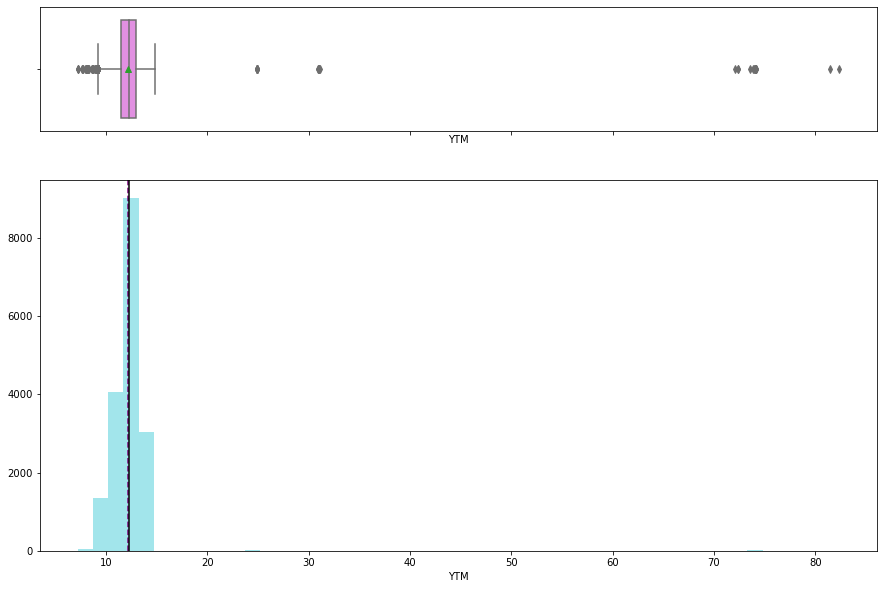

In [127]:
histogram_boxplot(df.YTM)


#Outliers in the dataset are retained as is. Outliers show extreme economic times, either a boom or bust and investors response
#in those instances.

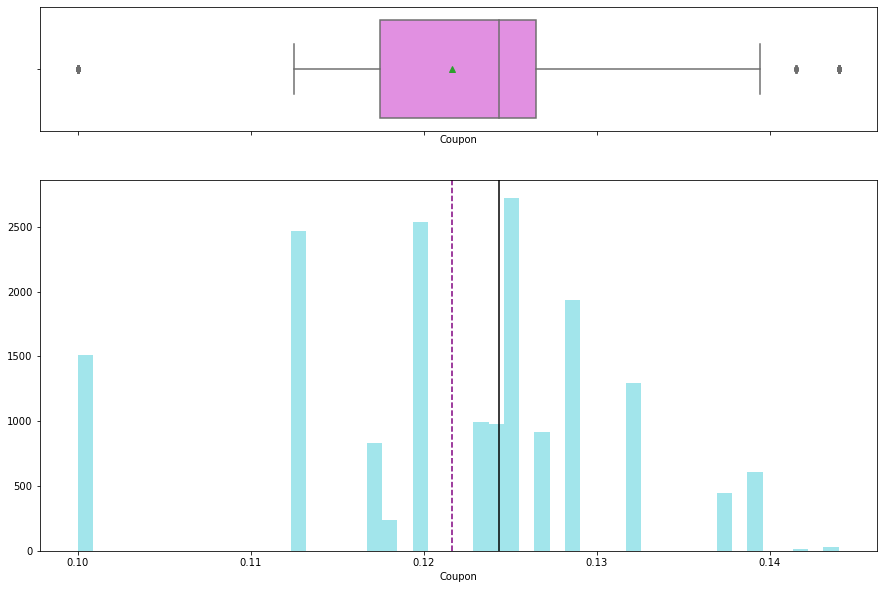

In [128]:
histogram_boxplot(df.Coupon)

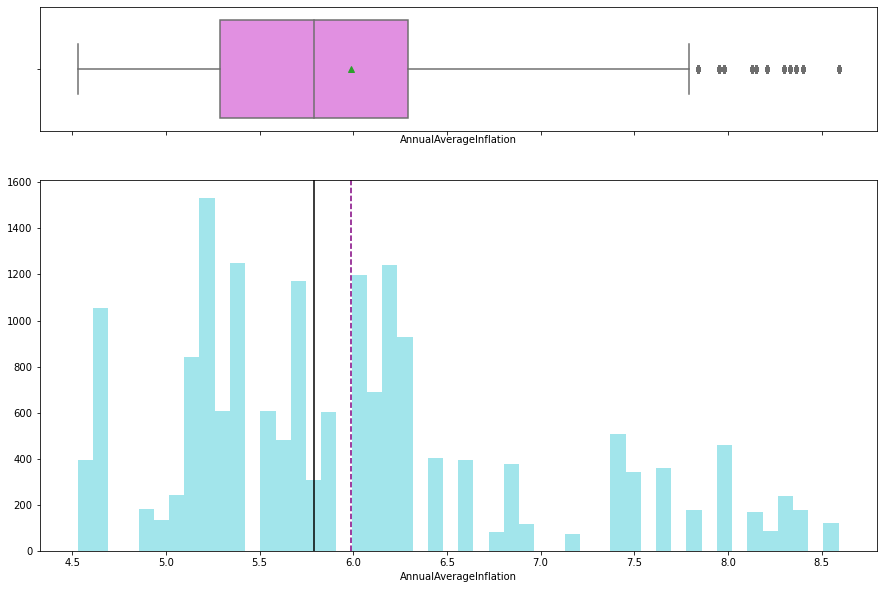

In [129]:
histogram_boxplot(df['AnnualAverageInflation'])

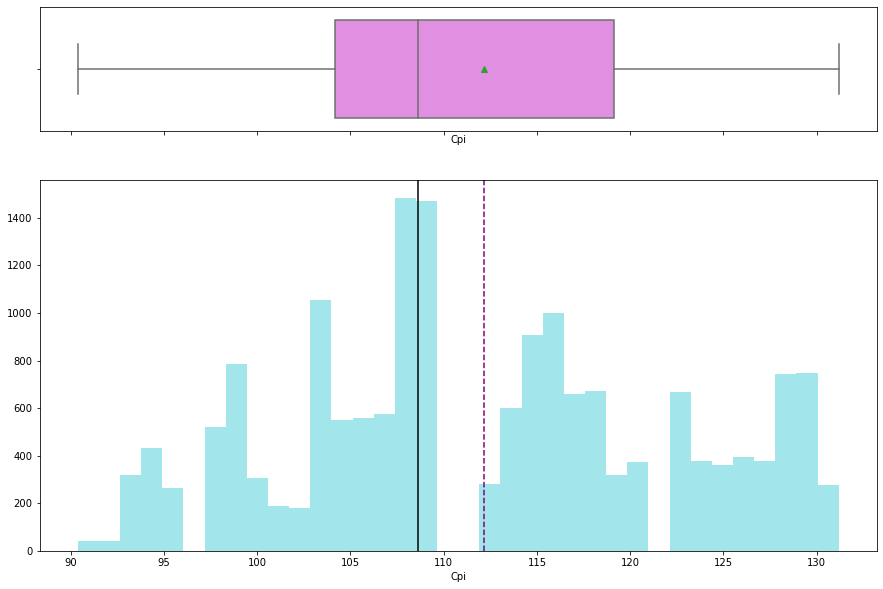

In [130]:
histogram_boxplot(df['Cpi'])

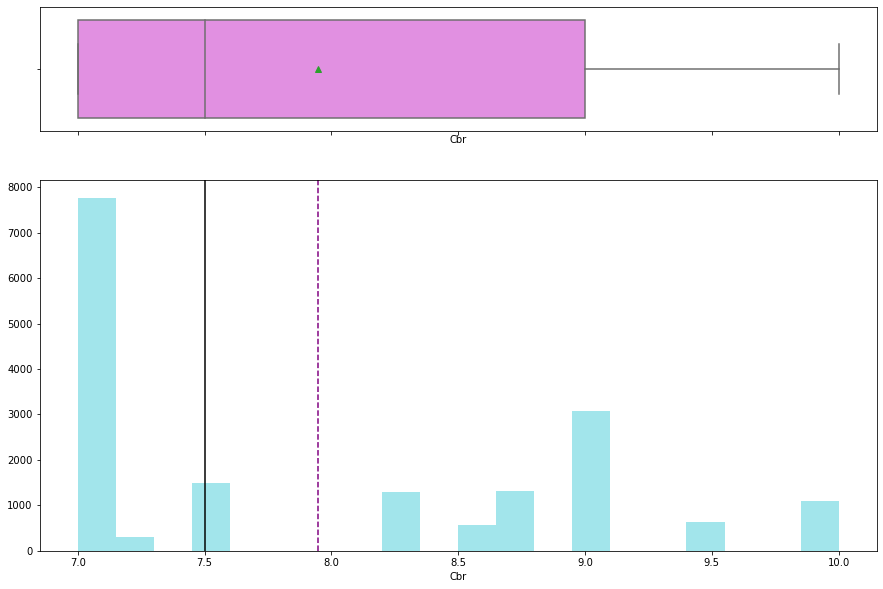

In [131]:
histogram_boxplot(df['Cbr'])

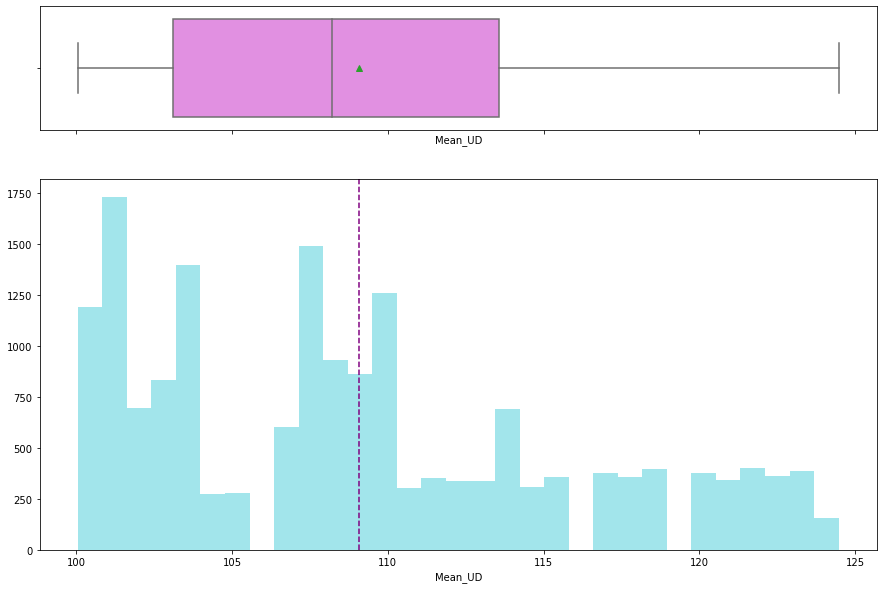

In [132]:
histogram_boxplot(df['Mean_UD'])

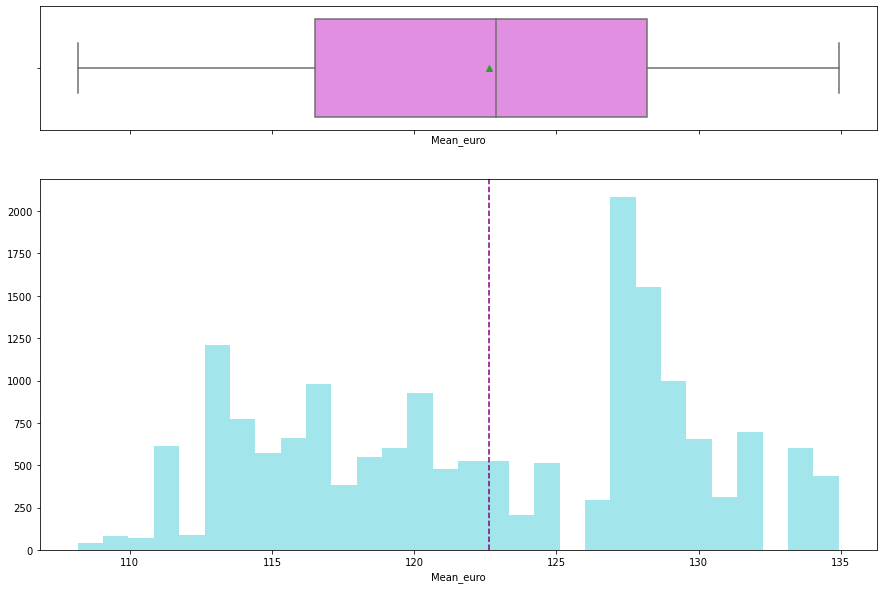

In [133]:
histogram_boxplot(df['Mean_euro'])

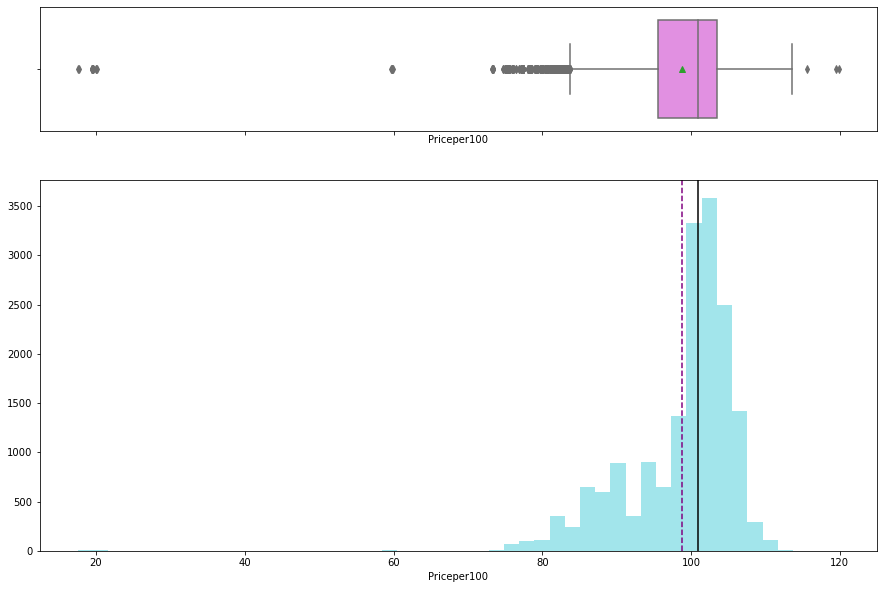

In [134]:
histogram_boxplot(df['Priceper100'])

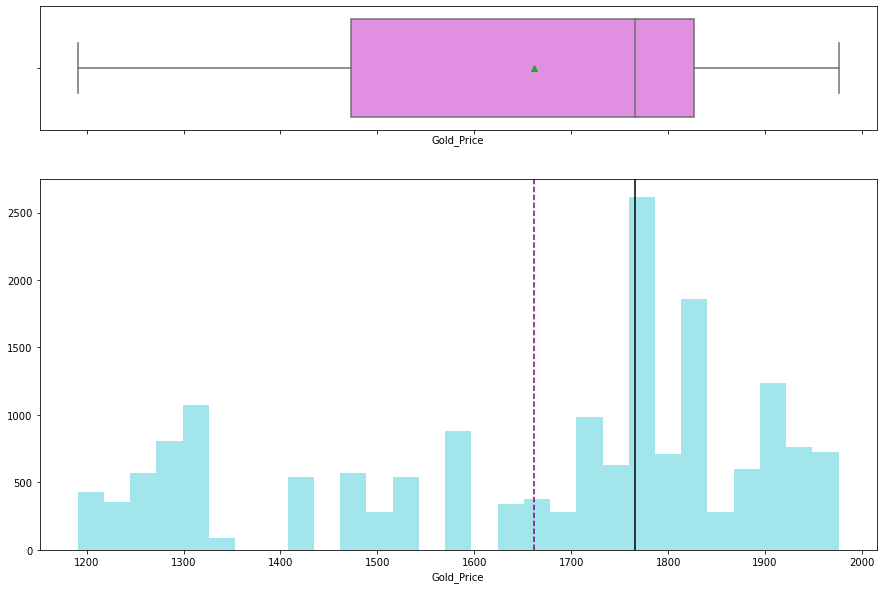

In [135]:
histogram_boxplot(df['Gold_Price'])

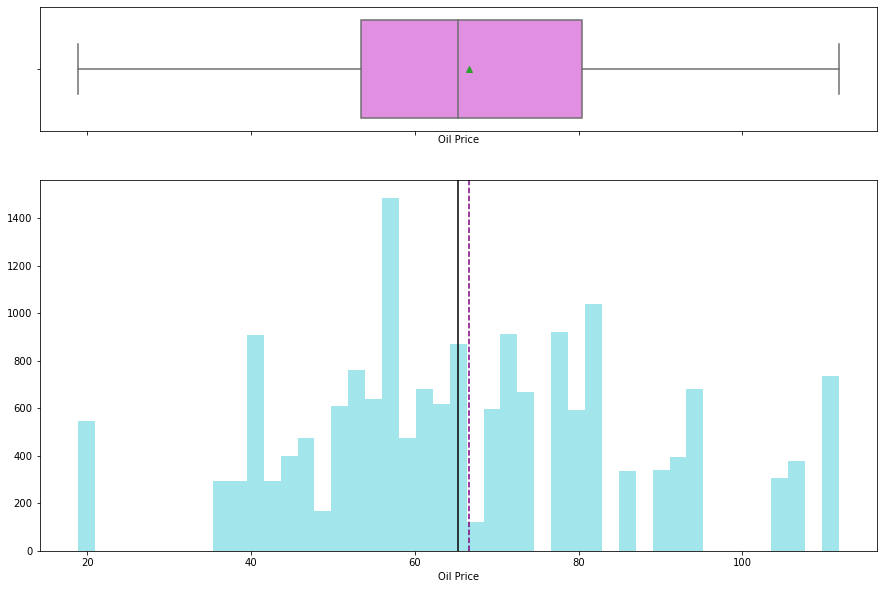

In [136]:
histogram_boxplot(df['Oil Price'])

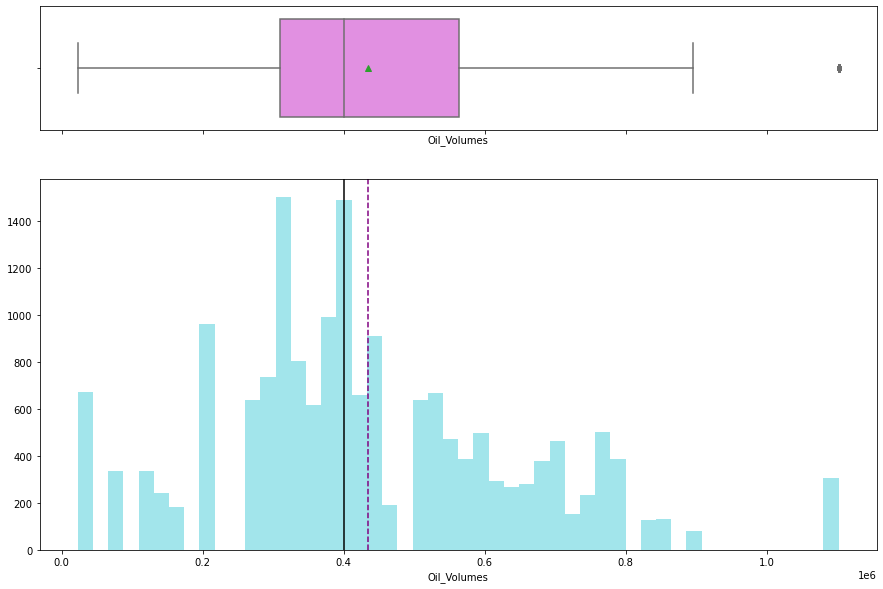

In [137]:
histogram_boxplot(df['Oil_Volumes'])

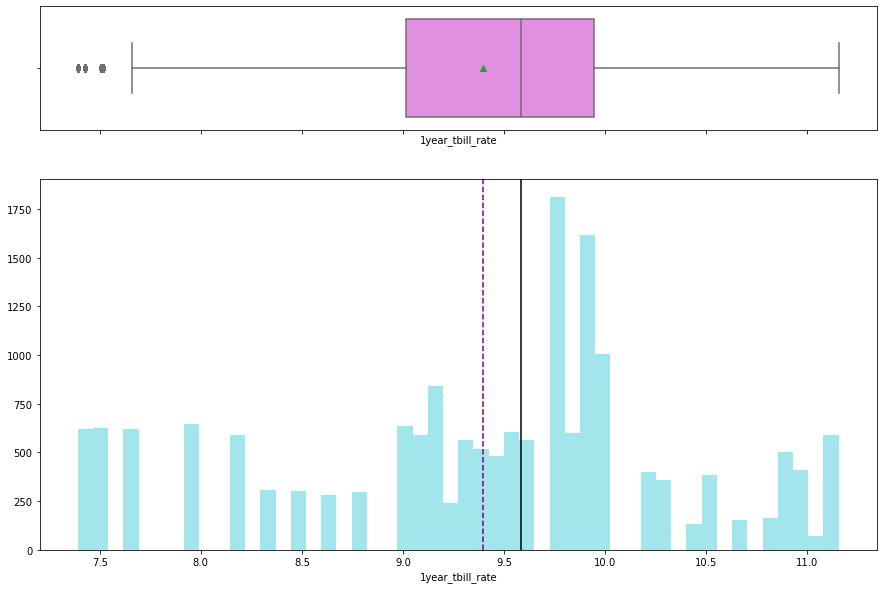

In [138]:
histogram_boxplot(df['1year_tbill_rate'])

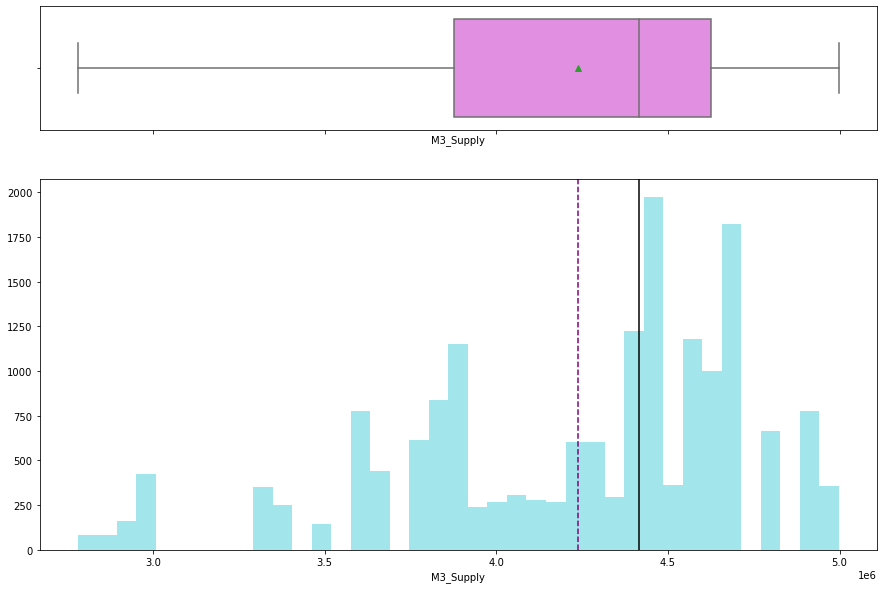

In [139]:
histogram_boxplot(df['M3_Supply'])

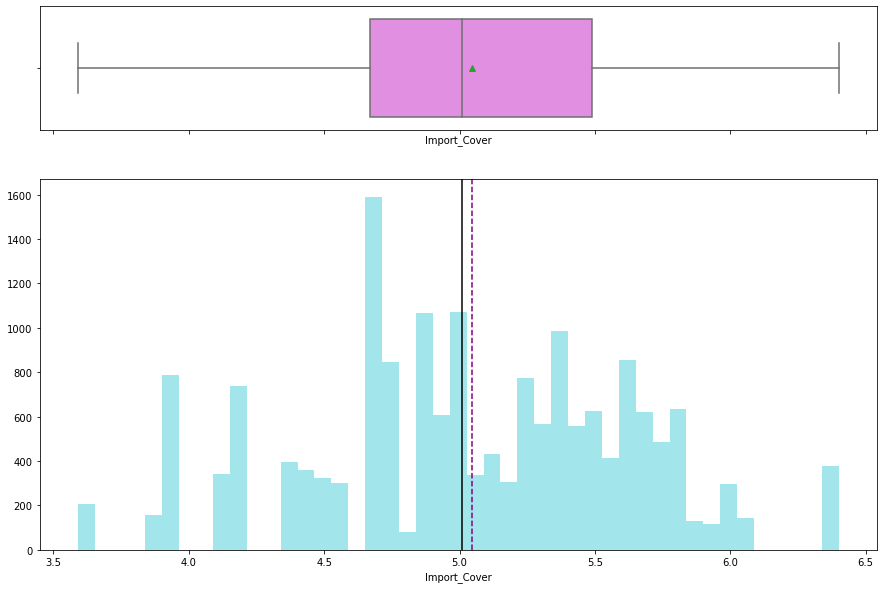

In [140]:
histogram_boxplot(df['Import_Cover'])

# BIVARIATE ANALYSIS

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [142]:
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [143]:
#creating a dataframe that will allow me to create a yield curve....plot Y=YTM and X=Tenor

curve = df[['Bond','YTM','Date','Tenor', 'Priceper100','AnnualAverageInflation', '12_MonthInflation','Cpi', 'Mean_UD', 'Mean_euro', 'Cbr','Gold_Price',
       'Oil Price', 'Oil_Volumes', '1year_tbill_rate','Year','Month','M3_Supply','Import_Cover']]
curve.head()

,Bond,YTM,Date,Tenor,Priceper100,AnnualAverageInflation,12_MonthInflation,Cpi,Mean_UD,Mean_euro,Cbr,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,Year,Month,M3_Supply,Import_Cover
0,FXD1/2010/25,13.91,2023-02-17,12.315934,84.506,8.3,9.23,130.13,124.4765,134.9229,8.75,1826.92,77.69,342121.0,10.676,2023,2,4564200.0,3.84
4,FXD1/2010/25,13.90,2023-02-16,12.318681,84.518,8.3,9.23,130.13,124.4765,134.9229,8.75,1826.92,77.69,342121.0,10.676,2023,2,4564200.0,3.84
8,FXD1/2010/25,13.90,2023-02-15,12.321429,84.515,8.3,9.23,130.13,124.4765,134.9229,8.75,1826.92,77.69,342121.0,10.676,2023,2,4564200.0,3.84
12,FXD1/2010/25,13.90,2023-02-14,12.324176,84.514,8.3,9.23,130.13,124.4765,134.9229,8.75,1826.92,77.69,342121.0,10.676,2023,2,4564200.0,3.84
16,FXD1/2010/25,13.90,2023-02-13,12.326923,84.513,8.3,9.23,130.13,124.4765,134.9229,8.75,1826.92,77.69,342121.0,10.676,2023,2,4564200.0,3.84


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

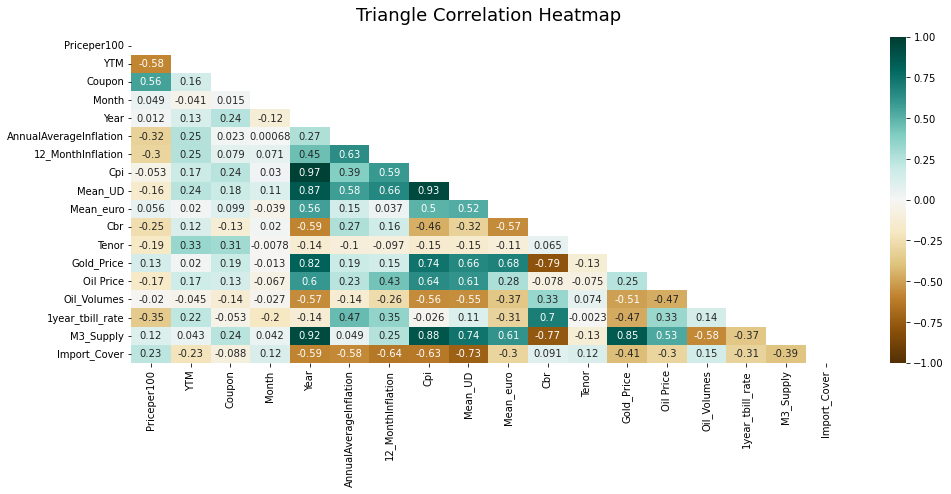

In [144]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with YTM')

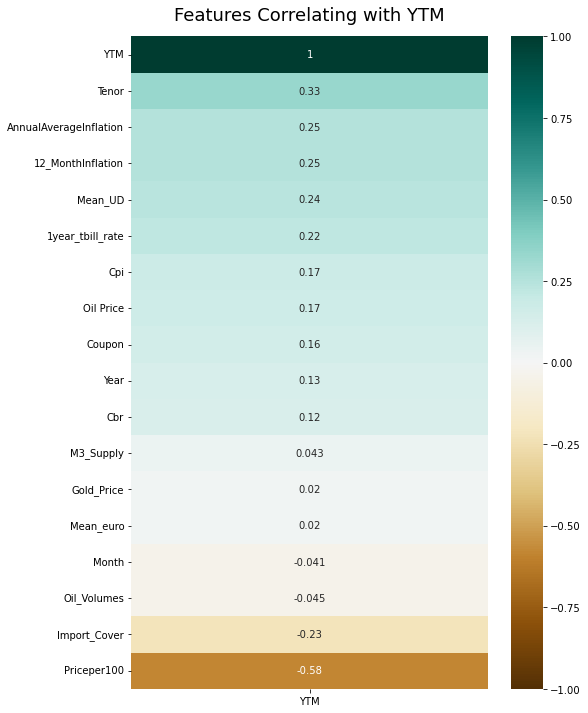

In [145]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['YTM']].sort_values(by='YTM', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with YTM', fontdict={'fontsize':18}, pad=16)

In [146]:
# Coupon and Price per 100, inflation, CPI and USD rate, are positively correlated
# Euro rate and CBR are negatively corretaled

#Coupon, CPI, Annualaverageinflation is not highly correlated to the target variable

#to avoid model unreliability, one of the highly correlated variables,that is, Year, Month, CPI ,annual average inflation


In [147]:
df.YTM.nunique()

587

In [148]:
df.YTM.value_counts().nlargest(30)

#Total unique values are 559, the target variable is a float object and therefore fits in the continous data category.

12.70    165
12.73    147
12.72    113
11.88    113
12.71    110
12.52    105
11.93    101
12.99     99
12.59     96
13.00     96
13.90     93
12.87     91
12.65     89
12.58     88
11.86     87
11.83     87
13.01     87
12.67     86
12.07     84
11.94     84
11.89     83
12.98     82
12.19     82
11.95     81
12.75     80
11.85     79
11.81     78
12.54     78
12.55     77
12.57     76
Name: YTM, dtype: int64

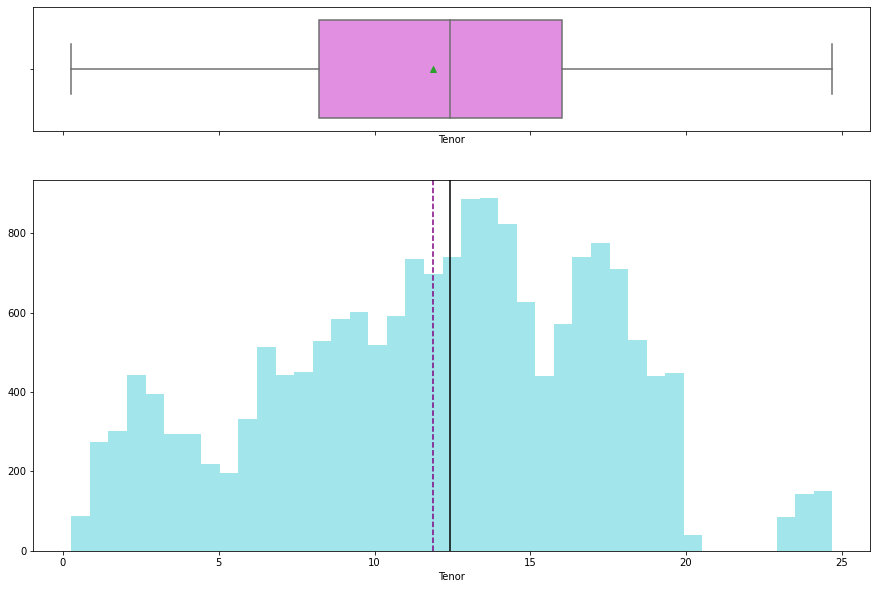

In [149]:
histogram_boxplot(curve.Tenor)

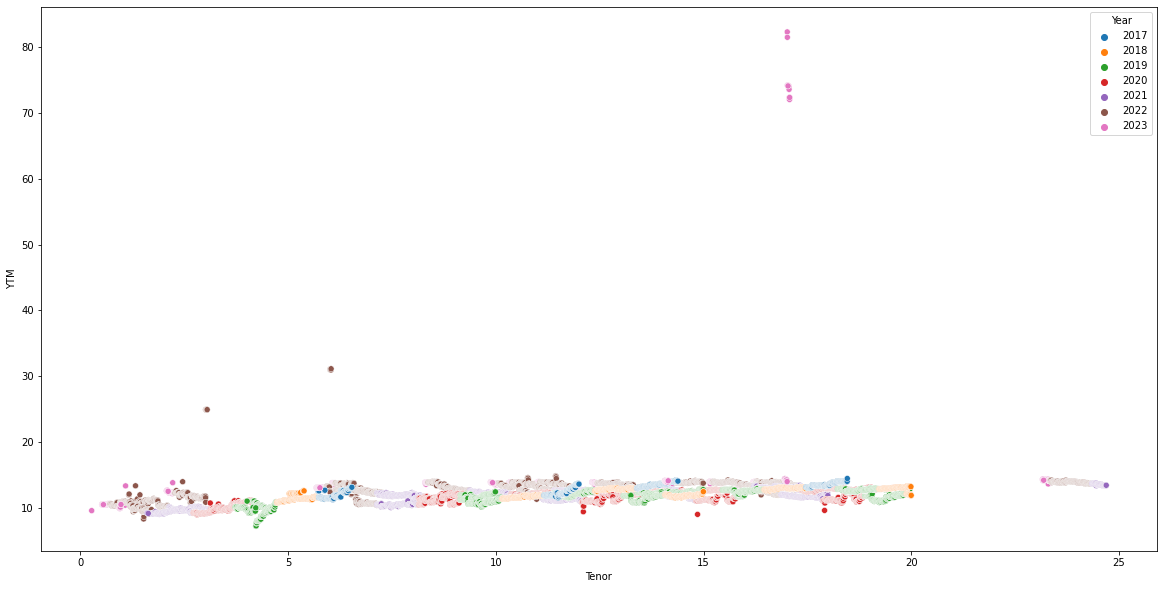

In [150]:
                    
plt.figure(figsize=(20, 10))
sns.scatterplot(x=curve.Tenor, y=curve.YTM, hue= curve.Year, palette= 'tab10')
plt.show()

#the yield has been lifting over the years, with 2022 with the highest yields.

In [151]:
curve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   YTM                     17540 non-null  float64       
 2   Date                    17540 non-null  datetime64[ns]
 3   Tenor                   17540 non-null  float64       
 4   Priceper100             17540 non-null  float64       
 5   AnnualAverageInflation  17540 non-null  float64       
 6   12_MonthInflation       17540 non-null  float64       
 7   Cpi                     17540 non-null  float64       
 8   Mean_UD                 17418 non-null  float64       
 9   Mean_euro               17418 non-null  float64       
 10  Cbr                     17540 non-null  float64       
 11  Gold_Price              17540 non-null  float64       
 12  Oil Price               17540 non-null  float6

In [152]:
curve = curve.groupby(['Month','Tenor','YTM', 'Year']).agg ({'Tenor':'mean', 'YTM':'mean'}).rename(columns = {'Tenor':'Tenor_years', 'YTM':'Avg_ytm' }).reset_index()
curve.head()

,Month,Tenor,YTM,Year,Tenor_years,Avg_ytm
0,1,0.631868,10.55,2023,0.631868,10.55
1,1,0.634615,10.49,2023,0.634615,10.49
2,1,0.642857,10.55,2023,0.642857,10.55
3,1,0.645604,10.50,2023,0.645604,10.50
4,1,0.648352,10.57,2023,0.648352,10.57


In [153]:
curve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        17534 non-null  int64  
 1   Tenor        17534 non-null  float64
 2   YTM          17534 non-null  float64
 3   Year         17534 non-null  int64  
 4   Tenor_years  17534 non-null  float64
 5   Avg_ytm      17534 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 822.0 KB


In [154]:
curve = curve.groupby(['Month','Year'])['Tenor_years', 'YTM'].agg('mean').reset_index()
curve.head()

,Month,Year,Tenor_years,YTM
0,1,2017,16.382915,14.077857
1,1,2018,11.925485,12.388764
2,1,2019,13.800325,12.019221
3,1,2020,12.458666,11.897370
4,1,2021,11.454670,11.605286


In [155]:
curve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        75 non-null     int64  
 1   Year         75 non-null     int64  
 2   Tenor_years  75 non-null     float64
 3   YTM          75 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.5 KB


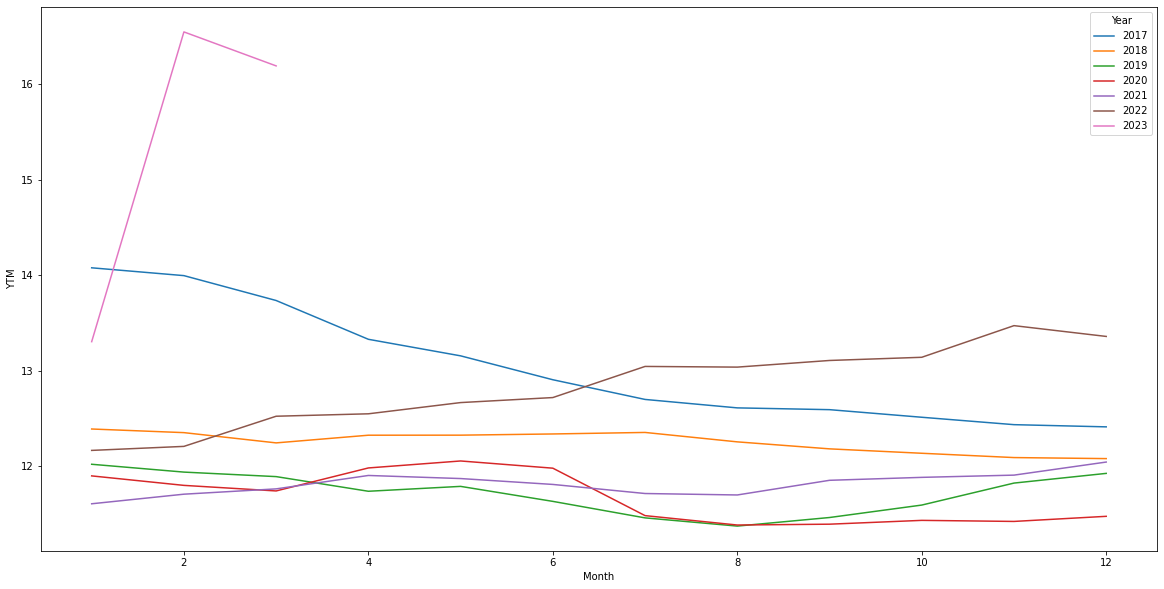

In [156]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=curve.Month, y=curve.YTM, hue= curve.Year, palette= 'tab10')
plt.show()

In [157]:
dt = df.loc[(df.Date == '2023-01-30') + (df.Date == '2022-01-27') + (df.Date == '2021-01-27')].reset_index()
dt.head()

,index,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,...,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,628,FXD1/2010/25,2023-01-30,84.517,13.90,0.11250,2010-06-28,2035-05-28,1,2023,...,123.4235,131.6574,8.75,12.365385,1928.36,78.87,312734.0,10.504,4564200.0,3.92
1,784,FXD1/2018/15,2023-01-30,93.712,13.80,0.12650,2018-05-28,2033-05-09,1,2023,...,123.4235,131.6574,8.75,10.307692,1928.36,78.87,312734.0,10.504,4564200.0,3.92
2,864,FXD1/2018/20,2023-01-30,95.144,13.97,0.13200,2018-03-26,2038-03-01,1,2023,...,123.4235,131.6574,8.75,15.134615,1928.36,78.87,312734.0,10.504,4564200.0,3.92
3,948,FXD1/2019/005,2023-01-30,100.724,10.54,0.11304,2019-02-25,2024-02-19,1,2023,...,123.4235,131.6574,8.75,1.057692,1928.36,78.87,312734.0,10.504,4564200.0,3.92
4,1028,FXD1/2019/10,2023-01-30,94.570,13.79,0.12438,2019-02-25,2029-02-12,1,2023,...,123.4235,131.6574,8.75,6.057692,1928.36,78.87,312734.0,10.504,4564200.0,3.92


In [158]:
dt = dt.drop(['index'], axis=1)

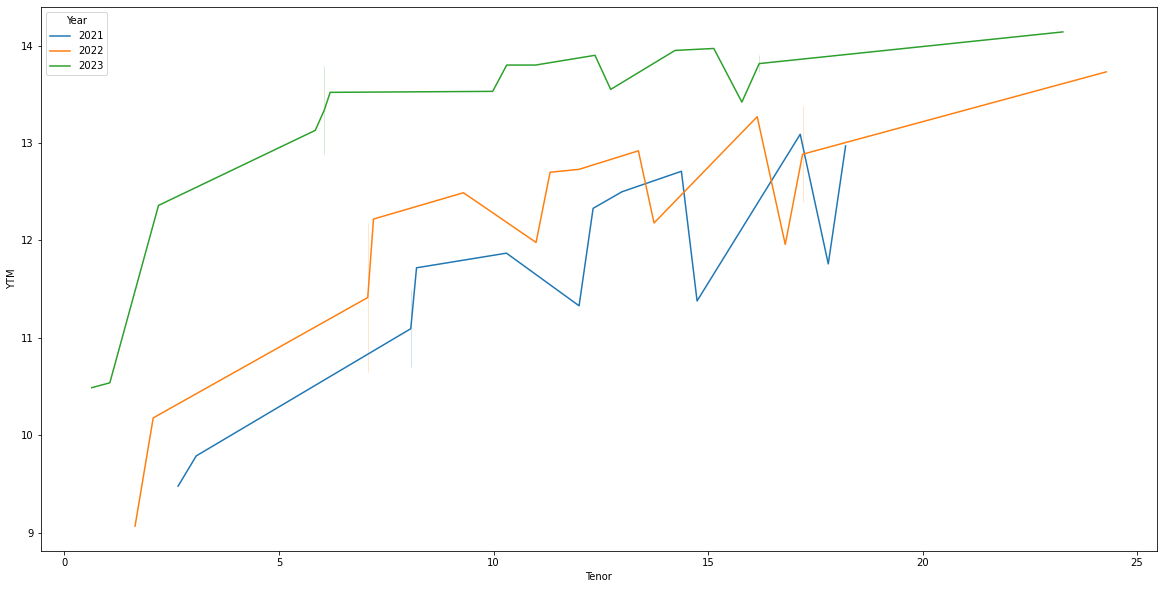

In [159]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=dt.Tenor, y=dt.YTM, hue= dt.Year, palette= 'tab10')
plt.show()

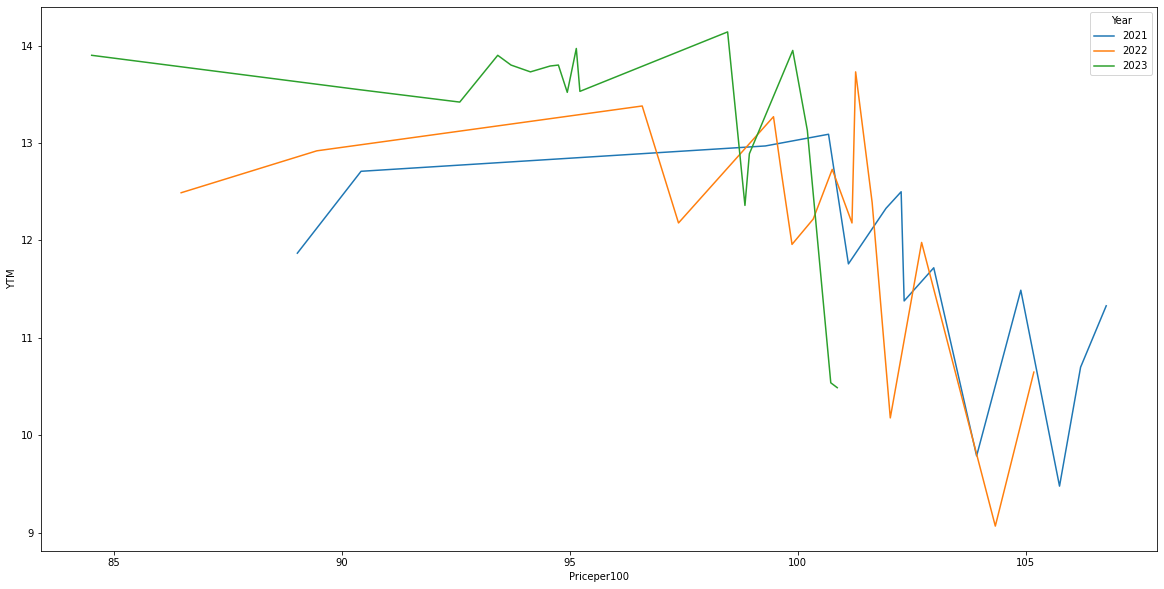

In [160]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=dt.Priceper100, y=dt.YTM, hue= dt.Year, palette= 'tab10')
plt.show()

In [161]:
def plot(feature1,feature2):

    plt.figure(figsize=(20, 10))
    sns.lineplot(x=feature1, y=feature2)
    plt.show()

In [162]:
def plot2(feature1,feature2):

    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=feature1, y=feature2)
    plt.show()

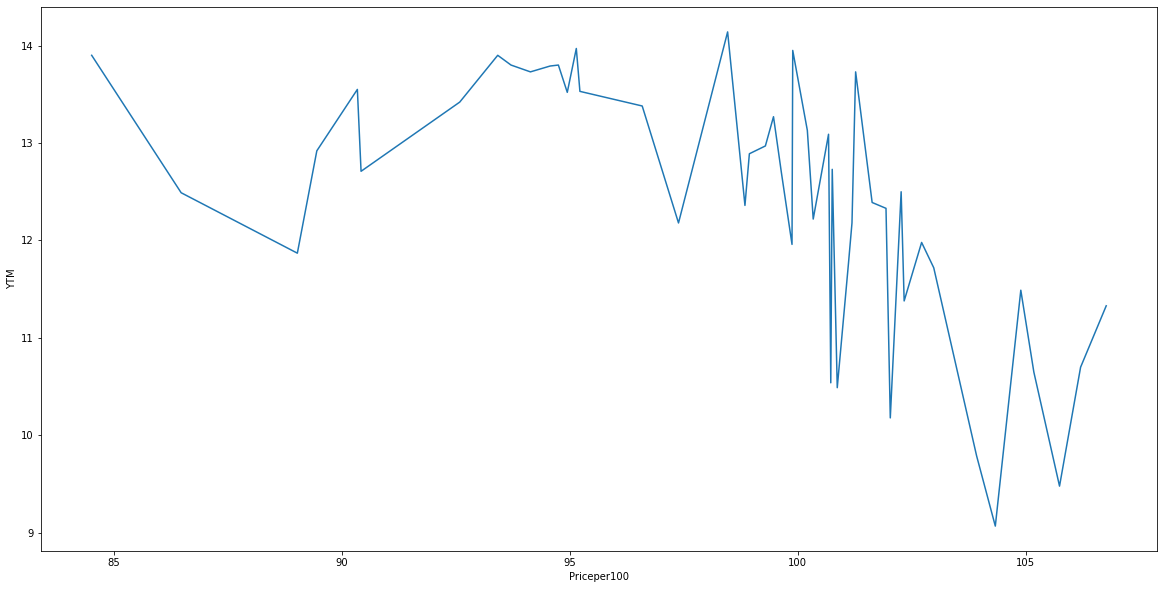

In [163]:
plot(dt.Priceper100, dt.YTM)

#there is an invers relationship between price and yield

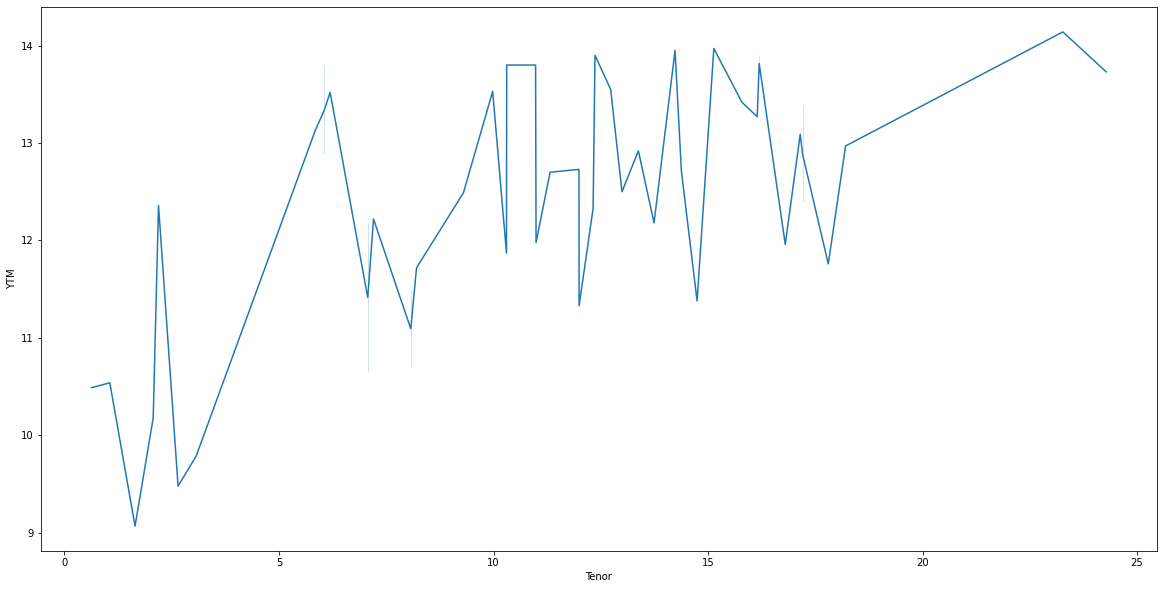

In [164]:
plot(dt.Tenor, dt.YTM)

In [165]:
df.Month.value_counts

<bound method IndexOpsMixin.value_counts of 0        2
4        2
8        2
12       2
16       2
        ..
78681    3
78686    3
78691    3
78696    3
78701    3
Name: Month, Length: 17540, dtype: int64>

<AxesSubplot:xlabel='Tenor', ylabel='YTM'>

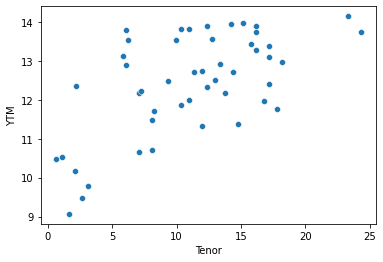

In [166]:
import seaborn as sns
sns.scatterplot(dt.Tenor, dt.YTM)

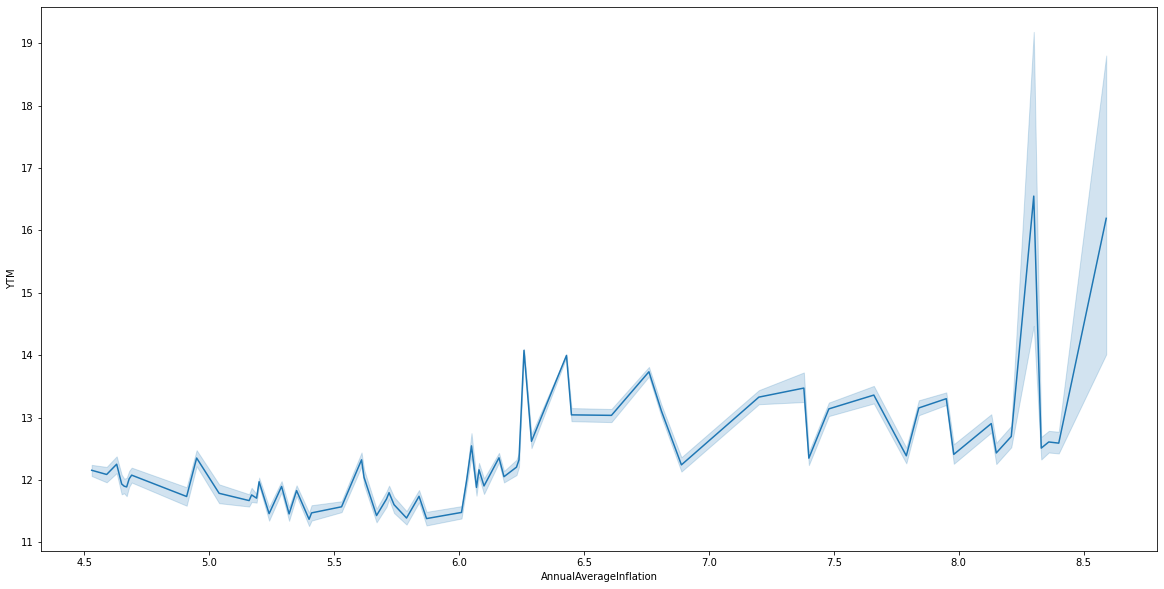

In [167]:
plot(df.AnnualAverageInflation, df.YTM)

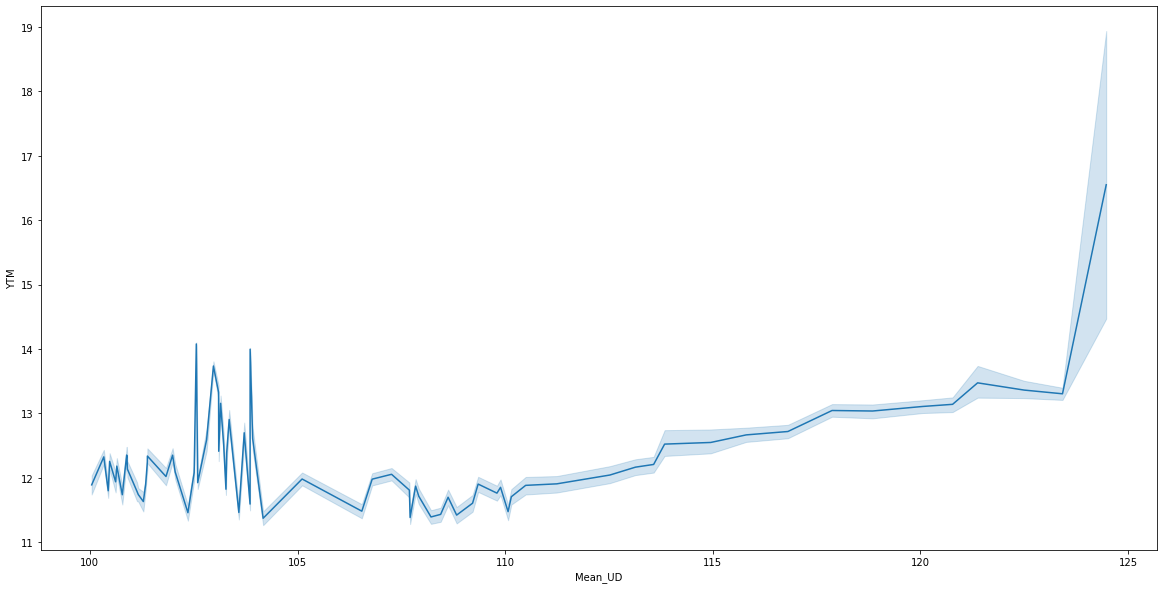

In [168]:
plot(df.Mean_UD, df.YTM)

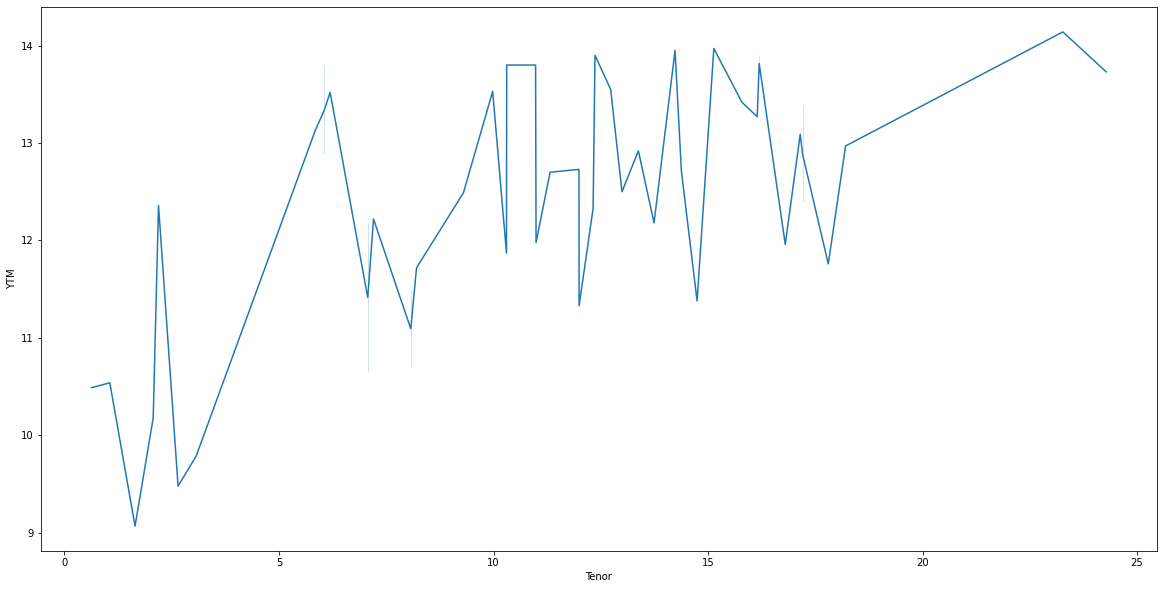

In [169]:
plot(dt.Tenor, dt.YTM)

In [170]:
df.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.315934,1826.92,77.69,342121.0,10.676,4564200.0,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.318681,1826.92,77.69,342121.0,10.676,4564200.0,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.321429,1826.92,77.69,342121.0,10.676,4564200.0,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.324176,1826.92,77.69,342121.0,10.676,4564200.0,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.326923,1826.92,77.69,342121.0,10.676,4564200.0,3.84


In [171]:
dt1 = df.copy()
dt1.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.315934,1826.92,77.69,342121.0,10.676,4564200.0,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.318681,1826.92,77.69,342121.0,10.676,4564200.0,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.321429,1826.92,77.69,342121.0,10.676,4564200.0,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.324176,1826.92,77.69,342121.0,10.676,4564200.0,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.326923,1826.92,77.69,342121.0,10.676,4564200.0,3.84


In [172]:
dt1 = dt1.groupby(['Bond','Year','Month']).agg({'Priceper100':'mean','YTM':'mean','Coupon':'mean','AnnualAverageInflation':'mean','Cpi':'mean','Mean_UD':'mean','Mean_euro':'mean','Cbr':'mean','Tenor':'mean'}).reset_index()

dt1.head()

,Bond,Year,Month,Priceper100,YTM,Coupon,AnnualAverageInflation,Cpi,Mean_UD,Mean_euro,Cbr,Tenor
0,FXD1/2010/25,2017,1,81.580857,14.068095,0.1125,6.26,90.374256,102.5628,108.1692,10.0,18.421376
1,FXD1/2010/25,2017,2,81.839800,14.021000,0.1125,6.43,91.930971,103.8589,111.6739,10.0,18.342582
2,FXD1/2010/25,2017,3,81.694696,14.051304,0.1125,6.76,93.462595,102.9750,109.0758,10.0,18.260033
3,FXD1/2010/25,2017,4,82.762444,13.862222,0.1125,7.20,95.131990,103.0989,110.1072,10.0,18.177198
4,FXD1/2010/25,2017,5,83.309045,13.773182,0.1125,7.84,95.842081,103.1478,112.4431,10.0,18.092532


In [173]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bond                    868 non-null    object 
 1   Year                    868 non-null    int64  
 2   Month                   868 non-null    int64  
 3   Priceper100             868 non-null    float64
 4   YTM                     868 non-null    float64
 5   Coupon                  868 non-null    float64
 6   AnnualAverageInflation  868 non-null    float64
 7   Cpi                     868 non-null    float64
 8   Mean_UD                 859 non-null    float64
 9   Mean_euro               859 non-null    float64
 10  Cbr                     868 non-null    float64
 11  Tenor                   868 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.5+ KB


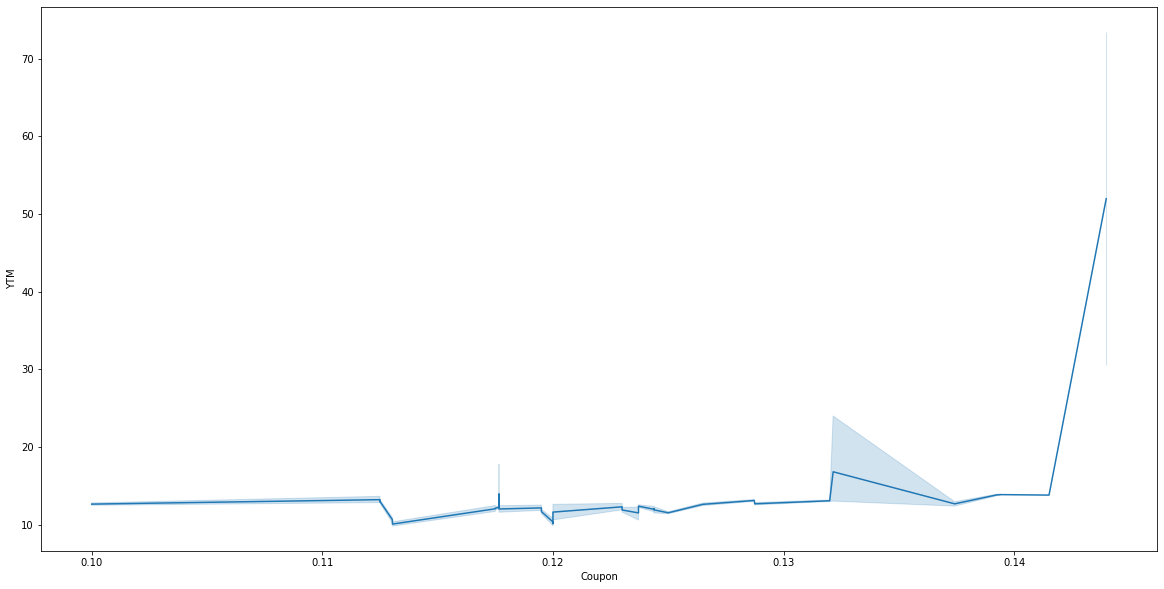

'When the interest rate(coupon) is underpriced, investors will demand a higher YTM and vise versa'

In [174]:
plot(dt1.Coupon, dt1.YTM)

'''When the interest rate(coupon) is underpriced, investors will demand a higher YTM and vise versa'''

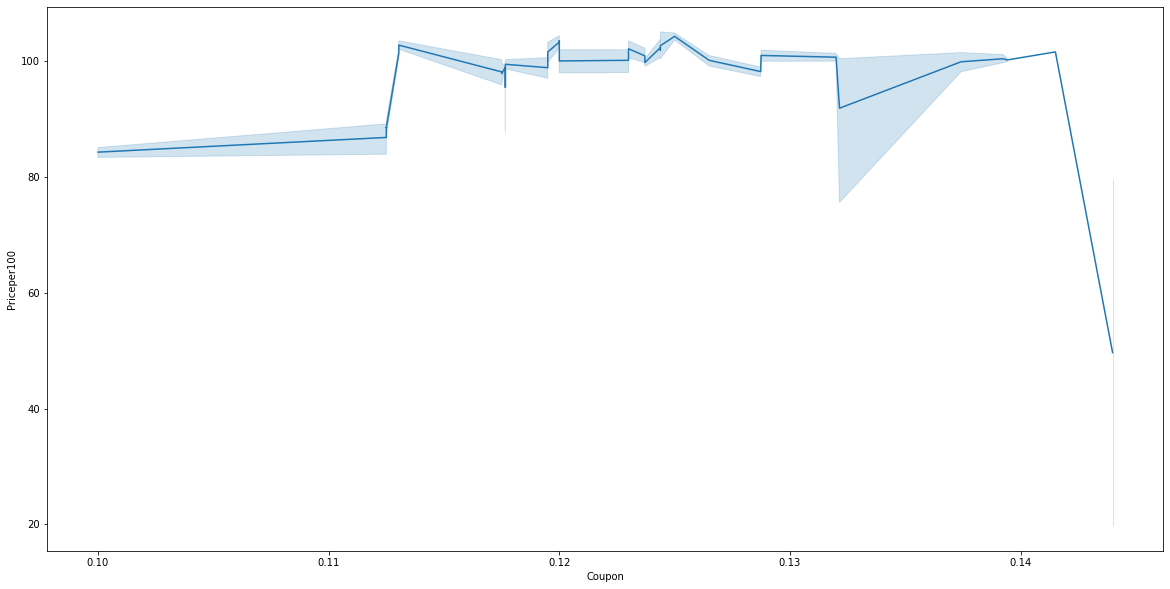

In [175]:
plot(dt1.Coupon, dt1.Priceper100)

In [176]:
def analysis(df, x_col, y_col):
    """
    Perform bivariate analysis on continuous datasets using multiple plot types.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data to analyze.
        x_col (str): The name of the column containing the x-axis data.
        y_col (str): The name of the column containing the y-axis data.
    """
    
    # Scatter plot
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.show()
    
    # Joint distribution plot
    sns.jointplot(x=x_col, y=y_col, data=df, kind='hex')
    plt.show()
    
    # Pairplot
    sns.pairplot(data=df, x_vars=x_col, y_vars=y_col)
    plt.show()


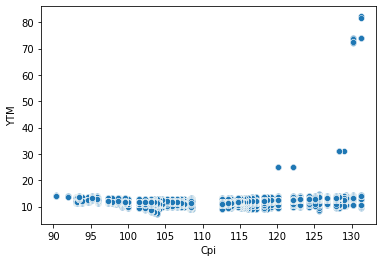

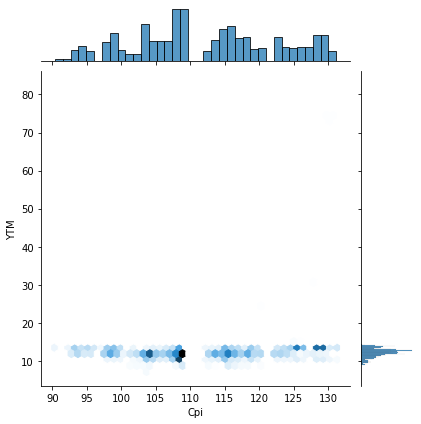

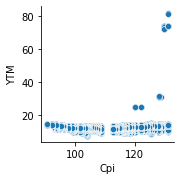

In [177]:
analysis(df, 'Cpi', 'YTM')

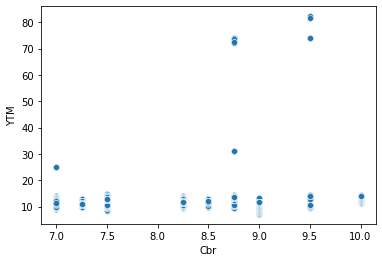

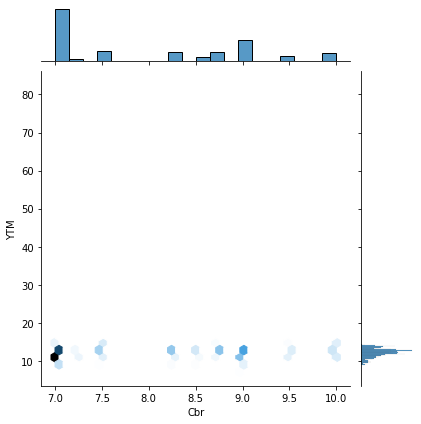

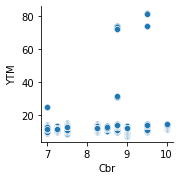

In [178]:
analysis(df, 'Cbr', 'YTM')

In [179]:
def pairplot(dataframe, plot_type='scatter', palette='deep', diag_kind='auto'):
    sns.set(style="ticks", color_codes=True,rc={'figure.figsize':(5,5)})
    sns.pairplot(dataframe, kind=plot_type, diag_kind=diag_kind, palette=palette)

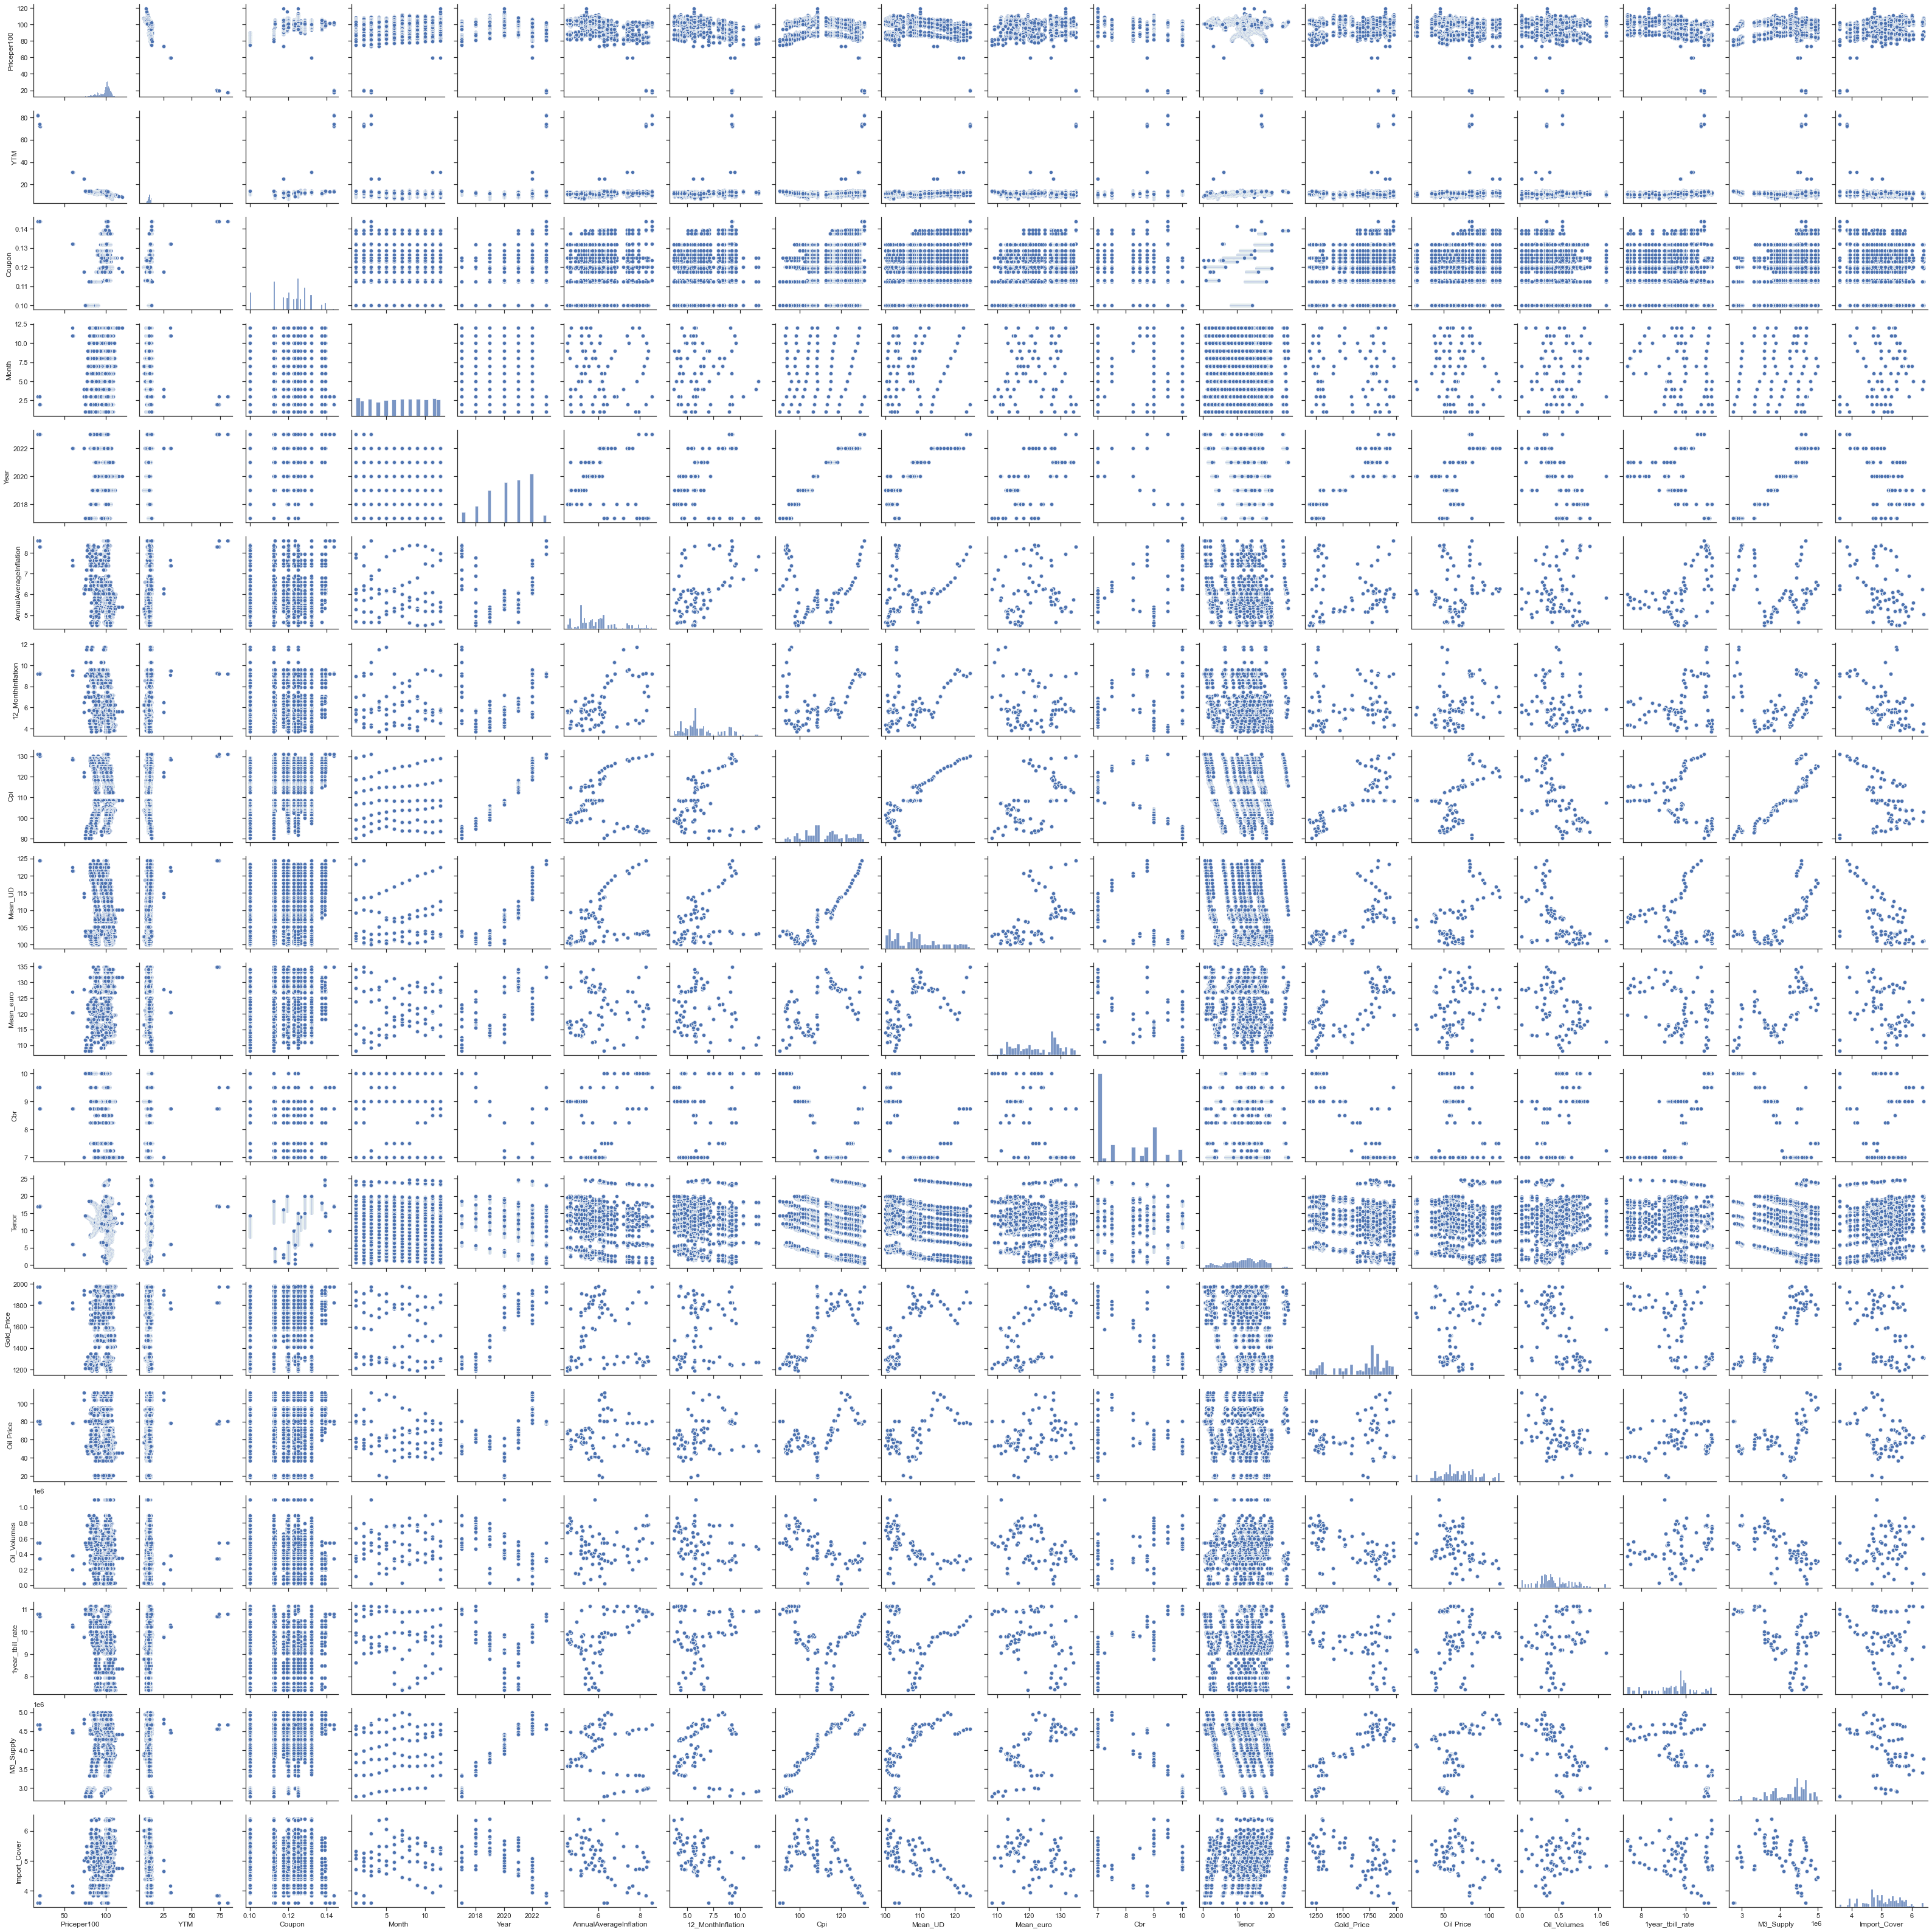

In [180]:
pairplot(df)

In [181]:
df.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.315934,1826.92,77.69,342121.0,10.676,4564200.0,3.84
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.318681,1826.92,77.69,342121.0,10.676,4564200.0,3.84
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.321429,1826.92,77.69,342121.0,10.676,4564200.0,3.84
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.324176,1826.92,77.69,342121.0,10.676,4564200.0,3.84
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,124.4765,134.9229,8.75,12.326923,1826.92,77.69,342121.0,10.676,4564200.0,3.84


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [185]:
data = df.copy()

In [186]:
data.shape

(17540, 22)

In [187]:
data.columns

Index(['Bond', 'Date', 'Priceper100', 'YTM', 'Coupon', 'Issue_date',
       'Maturity_date', 'Month', 'Year', 'AnnualAverageInflation',
       '12_MonthInflation', 'Cpi', 'Mean_UD', 'Mean_euro', 'Cbr', 'Tenor',
       'Gold_Price', 'Oil Price', 'Oil_Volumes', '1year_tbill_rate',
       'M3_Supply', 'Import_Cover'],
      dtype='object')

# FEATURE ENGINEERING

In [188]:
data['Bond_Type'] = data['Bond'].str.extract('(FXD|IFB)')
data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Mean_euro,Cbr,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover,Bond_Type
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,8.75,12.315934,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,8.75,12.318681,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,8.75,12.321429,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,8.75,12.324176,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,134.9229,8.75,12.326923,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD


In [189]:
data.Bond_Type.unique()

array(['FXD', 'IFB'], dtype=object)

In [190]:
# Calculate the percentage change in inflation from one period to the next
data['Cpi Change'] = data['Cpi'].pct_change()

# Calculate the standard deviation of the inflation changes

data['Cpi_volatility'] = data['Cpi Change'].std()
data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Tenor,Gold_Price,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover,Bond_Type,Cpi Change,Cpi_volatility
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,12.315934,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD,NaN,0.003456
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,12.318681,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,12.321429,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,12.324176,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,12.326923,1826.92,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [192]:
data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [193]:
data['Month'] = data['Date'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [194]:

data['Dollar_Change'] = data['Mean_UD'].pct_change()

data['dollar_volatility'] = data['Dollar_Change'].std()
data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover,Bond_Type,Cpi Change,Cpi_volatility,Dollar_Change,dollar_volatility
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,77.69,342121.0,10.676,4564200.0,3.84,FXD,NaN,0.003456,NaN,0.000573
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,77.69,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573


In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bond                    17540 non-null  object        
 1   Date                    17540 non-null  datetime64[ns]
 2   Priceper100             17540 non-null  float64       
 3   YTM                     17540 non-null  float64       
 4   Coupon                  17540 non-null  float64       
 5   Issue_date              17540 non-null  datetime64[ns]
 6   Maturity_date           17540 non-null  datetime64[ns]
 7   Month                   17540 non-null  int64         
 8   Year                    17540 non-null  int64         
 9   AnnualAverageInflation  17540 non-null  float64       
 10  12_MonthInflation       17540 non-null  float64       
 11  Cpi                     17540 non-null  float64       
 12  Mean_UD                 17418 non-null  float6

In [196]:
# create a new column based on the standard deviation values
data['std_dev_inflationCbr'] = data[['12_MonthInflation', 'Cbr']].std(axis=1)

data.head()


,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover,Bond_Type,Cpi Change,Cpi_volatility,Dollar_Change,dollar_volatility,std_dev_inflationCbr
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,342121.0,10.676,4564200.0,3.84,FXD,NaN,0.003456,NaN,0.000573,0.339411
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,342121.0,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411


In [197]:
data['std_dev_inflation_tbill'] = data[['12_MonthInflation', '1year_tbill_rate']].std(axis=1)

data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,1year_tbill_rate,M3_Supply,Import_Cover,Bond_Type,Cpi Change,Cpi_volatility,Dollar_Change,dollar_volatility,std_dev_inflationCbr,std_dev_inflation_tbill
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,10.676,4564200.0,3.84,FXD,NaN,0.003456,NaN,0.000573,0.339411,1.022476
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,10.676,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476


In [198]:
data['std_dev_Cbr_tbill'] = data[['Cbr', '1year_tbill_rate']].std(axis=1)

data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,M3_Supply,Import_Cover,Bond_Type,Cpi Change,Cpi_volatility,Dollar_Change,dollar_volatility,std_dev_inflationCbr,std_dev_inflation_tbill,std_dev_Cbr_tbill
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,4564200.0,3.84,FXD,NaN,0.003456,NaN,0.000573,0.339411,1.022476,1.361888
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,4564200.0,3.84,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888


In [199]:
data['Cbr_Change'] = data['Cbr'].pct_change()

data['Cbr_volatility'] = data['Cbr_Change'].std()
data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Bond_Type,Cpi Change,Cpi_volatility,Dollar_Change,dollar_volatility,std_dev_inflationCbr,std_dev_inflation_tbill,std_dev_Cbr_tbill,Cbr_Change,Cbr_volatility
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,FXD,NaN,0.003456,NaN,0.000573,0.339411,1.022476,1.361888,NaN,0.001672
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,FXD,0.0,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672


In [200]:

data['Importcover_Change'] = data['Import_Cover'].pct_change()
 
data['Importcover_volatility'] = data['Importcover_Change'].std()
data.head()

,Bond,Date,Priceper100,YTM,Coupon,Issue_date,Maturity_date,Month,Year,AnnualAverageInflation,...,Cpi_volatility,Dollar_Change,dollar_volatility,std_dev_inflationCbr,std_dev_inflation_tbill,std_dev_Cbr_tbill,Cbr_Change,Cbr_volatility,Importcover_Change,Importcover_volatility
0,FXD1/2010/25,2023-02-17,84.506,13.91,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,0.003456,NaN,0.000573,0.339411,1.022476,1.361888,NaN,0.001672,NaN,0.004065
4,FXD1/2010/25,2023-02-16,84.518,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
8,FXD1/2010/25,2023-02-15,84.515,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
12,FXD1/2010/25,2023-02-14,84.514,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
16,FXD1/2010/25,2023-02-13,84.513,13.90,0.1125,2010-06-28,2035-05-28,2,2023,8.3,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065


In [201]:
# data.fillna(method='ffill', inplace=True)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17540 entries, 0 to 78701
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Bond                     17540 non-null  object        
 1   Date                     17540 non-null  datetime64[ns]
 2   Priceper100              17540 non-null  float64       
 3   YTM                      17540 non-null  float64       
 4   Coupon                   17540 non-null  float64       
 5   Issue_date               17540 non-null  datetime64[ns]
 6   Maturity_date            17540 non-null  datetime64[ns]
 7   Month                    17540 non-null  int64         
 8   Year                     17540 non-null  int64         
 9   AnnualAverageInflation   17540 non-null  float64       
 10  12_MonthInflation        17540 non-null  float64       
 11  Cpi                      17540 non-null  float64       
 12  Mean_UD                  17418 n

In [203]:
data.dropna(inplace=True)

In [204]:
data.shape

(17417, 34)

# DATA DICTIONARY

# BORUTA

In [205]:
data.columns.values

array(['Bond', 'Date', 'Priceper100', 'YTM', 'Coupon', 'Issue_date',
       'Maturity_date', 'Month', 'Year', 'AnnualAverageInflation',
       '12_MonthInflation', 'Cpi', 'Mean_UD', 'Mean_euro', 'Cbr', 'Tenor',
       'Gold_Price', 'Oil Price', 'Oil_Volumes', '1year_tbill_rate',
       'M3_Supply', 'Import_Cover', 'Bond_Type', 'Cpi Change',
       'Cpi_volatility', 'Dollar_Change', 'dollar_volatility',
       'std_dev_inflationCbr', 'std_dev_inflation_tbill',
       'std_dev_Cbr_tbill', 'Cbr_Change', 'Cbr_volatility',
       'Importcover_Change', 'Importcover_volatility'], dtype=object)

In [206]:
x_sample = data[[ 'Month', 'Year',
       'AnnualAverageInflation', '12_MonthInflation', 'Cpi', 'Mean_UD',
       'Mean_euro', 'Cbr', 'Tenor', 'Gold_Price', 'Oil Price',
       'Oil_Volumes', '1year_tbill_rate', 'M3_Supply', 'Import_Cover','Bond_Type',
       'Cpi Change', 'Cpi_volatility', 'Dollar_Change',
       'dollar_volatility', 'std_dev_inflationCbr',
       'std_dev_inflation_tbill', 'std_dev_Cbr_tbill',
       'Cbr_Change', 'Cbr_volatility', 'Importcover_Change',
       'Importcover_volatility']]
x_sample.head()

,Month,Year,AnnualAverageInflation,12_MonthInflation,Cpi,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,...,Cpi_volatility,Dollar_Change,dollar_volatility,std_dev_inflationCbr,std_dev_inflation_tbill,std_dev_Cbr_tbill,Cbr_Change,Cbr_volatility,Importcover_Change,Importcover_volatility
4,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.318681,1826.92,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
8,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.321429,1826.92,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
12,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.324176,1826.92,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
16,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.326923,1826.92,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065
20,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.335165,1826.92,...,0.003456,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065


In [207]:
onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')

enc = onehot.fit_transform(x_sample[['Bond_Type']])
df = pd.DataFrame(index=x_sample.index, data=enc, columns=onehot.get_feature_names(['Bond_Type']))
x_sample = pd.concat([x_sample, df], axis=1)
x_sample.head()

,Month,Year,AnnualAverageInflation,12_MonthInflation,Cpi,Mean_UD,Mean_euro,Cbr,Tenor,Gold_Price,...,Dollar_Change,dollar_volatility,std_dev_inflationCbr,std_dev_inflation_tbill,std_dev_Cbr_tbill,Cbr_Change,Cbr_volatility,Importcover_Change,Importcover_volatility,Bond_Type_IFB
4,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.318681,1826.92,...,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065,0.0
8,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.321429,1826.92,...,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065,0.0
12,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.324176,1826.92,...,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065,0.0
16,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.326923,1826.92,...,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065,0.0
20,2,2023,8.3,9.23,130.13,124.4765,134.9229,8.75,12.335165,1826.92,...,0.0,0.000573,0.339411,1.022476,1.361888,0.0,0.001672,0.0,0.004065,0.0


In [208]:
x_sample.shape

(17417, 28)

In [209]:
data.Month.value_counts()

1     1596
11    1570
8     1518
9     1516
7     1498
12    1469
10    1431
6     1431
5     1402
3     1391
2     1328
4     1267
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='YTM'>

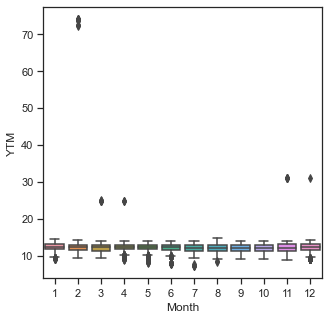

In [210]:
sns.boxplot(data.Month,data.YTM)

In [211]:
# export = x_sample
# export['YTM'] = y
# export.to_csv('Extra_features_data.csv')

In [212]:
x_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17417 entries, 4 to 78095
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    17417 non-null  int64  
 1   Year                     17417 non-null  int64  
 2   AnnualAverageInflation   17417 non-null  float64
 3   12_MonthInflation        17417 non-null  float64
 4   Cpi                      17417 non-null  float64
 5   Mean_UD                  17417 non-null  float64
 6   Mean_euro                17417 non-null  float64
 7   Cbr                      17417 non-null  float64
 8   Tenor                    17417 non-null  float64
 9   Gold_Price               17417 non-null  float64
 10  Oil Price                17417 non-null  float64
 11  Oil_Volumes              17417 non-null  float64
 12  1year_tbill_rate         17417 non-null  float64
 13  M3_Supply                17417 non-null  float64
 14  Import_Cover          

In [213]:
del x_sample['Bond_Type']

In [214]:
x_sample.columns.values

array(['Month', 'Year', 'AnnualAverageInflation', '12_MonthInflation',
       'Cpi', 'Mean_UD', 'Mean_euro', 'Cbr', 'Tenor', 'Gold_Price',
       'Oil Price', 'Oil_Volumes', '1year_tbill_rate', 'M3_Supply',
       'Import_Cover', 'Cpi Change', 'Cpi_volatility', 'Dollar_Change',
       'dollar_volatility', 'std_dev_inflationCbr',
       'std_dev_inflation_tbill', 'std_dev_Cbr_tbill', 'Cbr_Change',
       'Cbr_volatility', 'Importcover_Change', 'Importcover_volatility',
       'Bond_Type_IFB'], dtype=object)

In [215]:
y = data[['YTM']]

In [216]:
y.shape

(17417, 1)

In [217]:

xgb_model = xgb.XGBRegressor(verbosity=0)

bp = BorutaPy(estimator=xgb_model, n_estimators='auto', max_iter=100)
bp.fit(np.array(x_sample), np.array(y))     #label encode features for boruta/vif


bp_cols = x_sample.columns
best_feats = bp_cols[bp.support_].to_list()
better_feats = bp_cols[bp.support_weak_].to_list()

boruta_data = pd.DataFrame({
    "features": bp_cols, 
    "rank": bp.ranking_,     # 1 is the best
    "accept": bp.support_,
    "maybe": bp.support_weak_
})


print(len(boruta_data["features"]))
nboruta_cols = [ col for col, acc in zip(boruta_data["features"], boruta_data["accept"]) if acc == True]
print(len(nboruta_cols), nboruta_cols)

boruta_data.head(15)

27
18 ['Month', 'Year', 'AnnualAverageInflation', '12_MonthInflation', 'Cpi', 'Mean_UD', 'Mean_euro', 'Tenor', 'Gold_Price', 'Oil Price', 'Oil_Volumes', '1year_tbill_rate', 'M3_Supply', 'Import_Cover', 'std_dev_inflationCbr', 'std_dev_inflation_tbill', 'std_dev_Cbr_tbill', 'Bond_Type_IFB']


,features,rank,accept,maybe
0,Month,1,True,False
1,Year,1,True,False
2,AnnualAverageInflation,1,True,False
3,12_MonthInflation,1,True,False
4,Cpi,1,True,False
5,Mean_UD,1,True,False
6,Mean_euro,1,True,False
7,Cbr,2,False,False
8,Tenor,1,True,False
9,Gold_Price,1,True,False


# VARIANCE INFLATION FACTOR

In [218]:
x = x_sample[['Month', 'Year', 'AnnualAverageInflation', '12_MonthInflation', 'Cpi','Mean_UD', 'Mean_euro', 'Tenor', 'Oil Price',
              'Oil_Volumes', '1year_tbill_rate', 'M3_Supply', 'Import_Cover', 'std_dev_inflationCbr', 'std_dev_inflation_tbill',
              'std_dev_Cbr_tbill', 'Bond_Type_IFB']]

In [219]:
x.head()

,Month,Year,AnnualAverageInflation,12_MonthInflation,Cpi,Mean_UD,Mean_euro,Tenor,Oil Price,Oil_Volumes,1year_tbill_rate,M3_Supply,Import_Cover,std_dev_inflationCbr,std_dev_inflation_tbill,std_dev_Cbr_tbill,Bond_Type_IFB
4,2,2023,8.3,9.23,130.13,124.4765,134.9229,12.318681,77.69,342121.0,10.676,4564200.0,3.84,0.339411,1.022476,1.361888,0.0
8,2,2023,8.3,9.23,130.13,124.4765,134.9229,12.321429,77.69,342121.0,10.676,4564200.0,3.84,0.339411,1.022476,1.361888,0.0
12,2,2023,8.3,9.23,130.13,124.4765,134.9229,12.324176,77.69,342121.0,10.676,4564200.0,3.84,0.339411,1.022476,1.361888,0.0
16,2,2023,8.3,9.23,130.13,124.4765,134.9229,12.326923,77.69,342121.0,10.676,4564200.0,3.84,0.339411,1.022476,1.361888,0.0
20,2,2023,8.3,9.23,130.13,124.4765,134.9229,12.335165,77.69,342121.0,10.676,4564200.0,3.84,0.339411,1.022476,1.361888,0.0


In [220]:
sel_cols = ['Month',  
          'Tenor',  'Oil_Volumes', 
          'std_dev_inflationCbr',  'std_dev_Cbr_tbill','Bond_Type_IFB']
def calc_vif(df):
    data = pd.DataFrame()
    data["variables"] = df.columns
    data["VIF"] = [ variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return data

#vif = calc_vif(X_train_boruta)
vif = calc_vif(x[sel_cols])

nvif_cols = vif[vif["VIF"] < 10].variables.values
extra_vif_cols = [col for col in nvif_cols if col not in nboruta_cols]
vif

,variables,VIF
0,Month,3.434201
1,Tenor,5.119136
2,Oil_Volumes,5.478249
3,std_dev_inflationCbr,3.586539
4,std_dev_Cbr_tbill,3.204737
5,Bond_Type_IFB,1.595893


# MULTICOLLINEARITY CHECK USING CONDITION INDICES

It is used to identify which combinations of independent variables contribute the most to multicollinearity. The higher the condition indices the higher the contribution to multicollinearity.

High condition indices suggest that certain linear combinations of independent variables are strongly correlated, indicating potential multicollinearity issues

It is computed by calculating the square root of the ratio of the largest eigenvalue to the eigenvalue corresponding to a specific linear combination of the variables.

An eigenvalue is gotten by constructing one vector with one value to represent a large matrix.

Typically, columns with a value higher than 30 are rejected.

In [221]:
column_names = x.columns
# Calculate the correlation matrix
correlation_matrix = x.corr()

# Compute the eigenvalues and eigenvectors of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Sort the eigenvalues in descending order
sorted_indices = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Calculate the condition indices
condition_indices = np.sqrt(sorted_eigenvalues[0] / sorted_eigenvalues)

for col_name, condition_index in zip(column_names, condition_indices):
    print(f"Column: {col_name} | Condition Index: {condition_index}")

Column: Month | Condition Index: 1.0
Column: Year | Condition Index: 1.7857782973441332
Column: AnnualAverageInflation | Condition Index: 2.0518588308895587
Column: 12_MonthInflation | Condition Index: 2.5444646835749705
Column: Cpi | Condition Index: 2.7070197155097095
Column: Mean_UD | Condition Index: 2.9138545572839774
Column: Mean_euro | Condition Index: 3.0289995075264478
Column: Tenor | Condition Index: 3.3433163089919367
Column: Oil Price | Condition Index: 4.171300752778165
Column: Oil_Volumes | Condition Index: 4.582369494313036
Column: 1year_tbill_rate | Condition Index: 5.179613361155413
Column: M3_Supply | Condition Index: 7.751855359789179
Column: Import_Cover | Condition Index: 14.087680314245677
Column: std_dev_inflationCbr | Condition Index: 17.09224290961854
Column: std_dev_inflation_tbill | Condition Index: 21.155699731944573
Column: std_dev_Cbr_tbill | Condition Index: 59.27212989071808
Column: Bond_Type_IFB | Condition Index: 69.14897514315912


# TRAIN_TEST SPLIT

In [222]:
#'Tenor', 'Oil Price', 'Oil_Volumes', 'Month', 'std_dev_inflationCbr'
n_x = x_sample[['Month',     
          'Tenor',  'Oil_Volumes', 
          'std_dev_inflationCbr',  'std_dev_Cbr_tbill','Bond_Type_IFB'
          ]]

In [223]:
x_train, x_test, y_train, y_test = train_test_split(n_x, y, test_size = 0.2 , random_state = 0)

In [224]:
x_train

,Month,Tenor,Oil_Volumes,std_dev_inflationCbr,std_dev_Cbr_tbill,Bond_Type_IFB
22164,12,24.392857,78125.0,0.898026,1.673722,0.0
10512,7,12.939560,310043.0,0.579828,1.729583,0.0
73999,2,14.972527,464478.0,3.917372,0.817415,1.0
8058,9,14.607143,324678.0,0.657609,1.170262,0.0
30846,6,17.782967,563575.0,0.480833,0.467398,0.0
...,...,...,...,...,...,...
41562,11,14.923077,437000.0,1.180868,0.813880,1.0
59504,9,9.450549,704035.0,3.655742,0.411536,0.0
44338,8,14.799451,451575.0,1.866762,0.358503,0.0
48754,5,17.821429,545344.0,1.180868,1.554221,0.0


In [225]:
sc = StandardScaler()

sc_train = sc.fit_transform(x_train)
x_train_sc =  pd.DataFrame(sc_train)
x_train_sc.columns = x_train.columns
x_train = x_train_sc

#Test
sc_test = sc.transform(x_test)
x_test_sc = pd.DataFrame(sc_test)
x_test_sc.columns= x_test.columns
x_test = x_test_sc

# XGBOOST

In [226]:
xg = xgb.XGBRegressor(n_estimators=1000, random_state = 0, learning_rate = 0.005, max_depth=16)
model = xg.fit(x_train, y_train)

In [227]:
y_pred_xgb = xg.predict(x_test)

In [228]:
r2_score(y_test, y_pred_xgb)

0.9734303281488597

In [229]:
#considers the number of independent variables and their input on the model. classic r2 improves with increase in 
#features which allows for model overffitting.


def adjusted_r2_score(y_test, y_pred, num_predictors):
    n = len(y_test)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - num_predictors - 1))
    return adjusted_r2

num_predictors = 6

adjusted_r2_score(y_test=y_test, y_pred=y_pred_xgb,num_predictors = 6)

0.9733844788445436

In [230]:
#how far on average, the predictions are from the true value

mean_squared_error(y_test,y_pred_xgb)

0.10271877431679384

In [231]:
#the difference between the perdiction and actual value

mean_absolute_error(y_test,y_pred_xgb)

0.10101949014565152

# CATBOOST

In [ ]:
%%time
CatB = CatBoostRegressor(iterations=1000, learning_rate=0.005, depth=16, loss_function= 'RMSE',l2_leaf_reg= 1)
CatB.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False)

In [ ]:
y_pred_CatB = CatB.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred_CatB)

In [ ]:
r2_score(y_test,y_pred_CatB)

In [ ]:
mean_absolute_error(y_test, y_pred_CatB)

# RANDOM FOREST REGRESSOR

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=15)
regressor.fit(x_train, y_train)
y_pred_regressor = regressor.predict(x_test)
r2_score(y_test,y_pred_regressor)

In [ ]:
adjusted_r2_score(y_test=y_test, y_pred=y_pred_regressor,num_predictors = 6)

In [ ]:
mean_squared_error(y_test,y_pred_regressor)

In [ ]:
mean_absolute_error(y_test,y_pred_regressor)

# SHAP

In [ ]:
%%time

explainer = shap.Explainer(model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(x_test)


shap.summary_plot(shap_values, x_test, feature_names=n_x.columns)


In [ ]:
reg_explainer = shap.Explainer(regressor)

In [ ]:
%%time
shap_values = reg_explainer.shap_values(x_test)

In [ ]:
# Plot the summary plot

shap.summary_plot(shap_values, x_test, feature_names=n_x.columns)

In [ ]:
# Make predictions on the training and test sets
y_train_pred = regressor.predict(x_train)
y_test_pred = regressor.predict(x_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print("Training set:")
print("Mean Squared Error: ", train_mse)
print("R^2 Score: ", train_r2)

print("\nTest set:")
print("Mean Squared Error: ", test_mse)
print("R^2 Score: ", test_r2)

In [ ]:
#XGBOOST
# Make predictions on the training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print("Training set:")
print("Mean Squared Error: ", train_mse)
print("R^2 Score: ", train_r2)

print("\nTest set:")
print("Mean Squared Error: ", test_mse)
print("R^2 Score: ", test_r2)

In [ ]:
#CATBOOST
# Make predictions on the training and test sets
y_train_pred = CatB.predict(x_train)
y_test_pred = CatB.predict(x_test)

# Calculate the performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the performance metrics
print("Training set:")
print("Mean Squared Error: ", train_mse)
print("R^2 Score: ", train_r2)

print("\nTest set:")
print("Mean Squared Error: ", test_mse)
print("R^2 Score: ", test_r2)

In [ ]:
#XGBOOST
explainer = shap.Explainer(model)
shap_values = explainer(x_test)

shap.plots.bar(shap_values, max_display=20)

In [ ]:
#CATBOOST
explainer = shap.Explainer(CatB)
shap_values = explainer(x_test)

shap.plots.bar(shap_values, max_display=20)

In [ ]:
#RANDOM FOREST
explainer = shap.Explainer(regressor)
shap_values = explainer(x_test)

shap.plots.bar(shap_values, max_display=20)

# TEST MODEL ON RL EXAMPLE

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.loc[data['std_dev_inflationCbr'] == data['std_dev_inflationCbr'].min()]

In [ ]:
#Inflation_tbill

# Calculate the difference between x and y
diff = 6.910 - 7.949

# Calculate the squared difference
squared_diff = np.square(diff)

# Calculate the sum of squared differences
sum_squared_diff = np.sum(squared_diff)

n = len(data)

# Calculate the standard deviation using the formula
std_dev = np.sqrt(sum_squared_diff / (n - 1))

print("Standard Deviation:", std_dev)

In [ ]:
n

In [ ]:

# Calculate the difference between x and y
diff = 8 - 9.5

# Calculate the squared difference
squared_diff = np.square(diff)

# Calculate the sum of squared differences
sum_squared_diff = np.sum(squared_diff)

n = len(data)

# Calculate the standard deviation using the formula
std_dev = np.sqrt(sum_squared_diff / (n - 1))

print("Standard Deviation:", std_dev)


In [ ]:

# Calculate the difference between x and y
diff = 9.5 - 11.608

# Calculate the squared difference
squared_diff = np.square(diff)

# Calculate the sum of squared differences
sum_squared_diff = np.sum(squared_diff)

n = len(data)

# Calculate the standard deviation using the formula
std_dev = np.sqrt(sum_squared_diff / (n - 1))

print("Standard Deviation:", std_dev)

In [ ]:

# 2. Prepare the new input data
new_features = np.array([[6, 7, 300724, 1.1326643360318057, 1.5917709469033647, 1 ]])  # Replace with your actual new feature values

# 4. Perform the prediction
predictions = model.predict(new_features)


In [ ]:
#XGBOOST

predictions

In [ ]:
#RANDOM FOREST

predictions2 = regressor.predict(new_features)
predictions2

In [ ]:
#CATBOOST

predictions3 = CatB.predict(new_features)
predictions3